# **Project Name**    - Netflix Content Analysis: An Exploratory Data Approach



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** - Veerendra Kashyap

# **Project Summary -**

In today’s digital-first entertainment landscape, Netflix has emerged as a global leader in the video streaming space, serving a diverse audience across different regions with a vast content library. With thousands of titles ranging from TV shows and movies to documentaries and original series, understanding what this content landscape looks like—its composition, trends, and evolution—is essential. This project focuses on performing a detailed Exploratory Data Analysis (EDA) of the Netflix dataset to gain insights into the content distribution, genre dynamics, release timelines, and regional contributions.

The dataset employed in this analysis is a publicly available Netflix content dataset containing information about the titles available on the platform. The data includes features such as title, type (Movie or TV Show), director, cast, country of origin, date the title was added to Netflix, release year, rating, duration, genre classification, and short descriptions. Although the dataset does not contain user metrics or engagement data, it is still rich in categorical, textual, and time-series information, offering substantial value for exploratory insights.

The project begins with loading and inspecting the dataset to understand its structure, completeness, and consistency. Missing values, duplicates, and formatting issues are addressed during the data cleaning phase. Key transformations such as converting date fields to datetime objects, extracting year components, and creating derived columns (like `year_added`) allow for deeper temporal analysis. The data is then explored through descriptive statistics and visualizations to uncover patterns and trends.

One of the first noticeable observations is the higher volume of movies compared to TV shows on the platform, although the latter have shown consistent growth in recent years. The majority of the content originates from countries such as the United States, India, and the United Kingdom, indicating Netflix’s strong partnerships and market presence in these regions. Moreover, the platform appears to have significantly ramped up its content acquisition and production around 2019–2020, reflecting its aggressive global expansion strategy.

The project also explores genre distributions and finds that dramas, comedies, and international content dominate the listings. By breaking down the genres and analyzing them over time, we observe trends in the increasing presence of niche genres such as stand-up comedy and international documentaries. These trends provide insights into evolving viewer preferences and Netflix’s adaptation to global tastes.

Ratings analysis reveals that content rated TV-MA, TV-14, and PG-13 are most prevalent, suggesting a primary focus on adult and young adult demographics. The analysis of content duration shows predictable patterns—TV shows typically have standardized season durations, while movies vary more widely in length. Additionally, the analysis of the ‘date\_added’ column highlights certain seasonal spikes in content releases, hinting at possible release strategies or regional content acquisition drives.

Another key aspect examined is the distribution and diversity of directors and cast members. Although a large number of records have missing values in these fields, the available data still indicates a concentration of work among a relatively small pool of popular creators and actors, while also reflecting Netflix’s effort to include international talent.

Throughout the project, visual tools such as bar charts, count plots, line graphs, and heatmaps are used to support the insights and storytelling. These visualizations not only make patterns more apparent but also help in communicating findings effectively to stakeholders who may not have technical expertise. The use of word clouds based on content descriptions adds a qualitative layer to the analysis by surfacing commonly used themes and keywords across the platform.

By breaking down the dataset in this way, the project provides a clear and comprehensive understanding of how Netflix has structured its content library and how it has evolved over time. Each variable and trend has been carefully examined to offer a multi-dimensional view of the platform’s offerings.

# **GitHub Link -**

https://github.com/veerendrakashyap/Netflix-Content-Analysis

# **Problem Statement**


Netflix hosts a vast and diverse content library, but lacks clear visibility into the distribution and trends of its offerings. Understanding which types of content dominate, how genres and countries contribute, and how content has evolved over time is crucial for strategic planning. This project aims to explore the Netflix dataset to uncover patterns in content type, release trends, ratings, and genres. The insights will help guide data-driven decisions for content acquisition and audience targeting.

#### **Define Your Business Objective?**

The primary business objective of this project is to utilize data-driven insights to support Netflix in optimizing its content strategy, improving viewer engagement, and strengthening its competitive position in the global streaming market. With a rapidly expanding user base and increasing competition, Netflix must continuously evaluate the structure and performance of its content library to ensure it meets the evolving preferences of its audience.

By conducting an Exploratory Data Analysis (EDA) on the Netflix dataset, we aim to identify and understand key patterns across various dimensions—such as content type (movies vs. TV shows), genre distribution, regional contributions, release timelines, and rating classifications. This understanding will help stakeholders make more informed decisions about what type of content to invest in, which genres to promote, which regions to expand in, and how to schedule releases to maximize viewer interest.

In particular, this analysis will answer questions such as:

* What is the ratio of movies to TV shows, and how has that changed over time?
* Which genres and countries are most dominant on the platform?
* Are there specific time periods where content is added more frequently?
* What age groups are being targeted based on the ratings?

The insights generated will serve as a foundation for building strategic initiatives such as region-specific content investment, personalized content recommendation, and optimized content scheduling. Ultimately, the goal is to empower Netflix to better align its offerings with user demand, enhance viewer retention, and drive sustainable growth through smarter content decisions.

### Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [16]:
df = pd.read_csv("Netflix_Data.csv")

### Dataset First View

In [22]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [24]:
df.shape

(7787, 12)

### Dataset Information

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [28]:
df.duplicated().sum()

0

#### Missing Values/Null Values

In [30]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

#### Visualizing the missing values

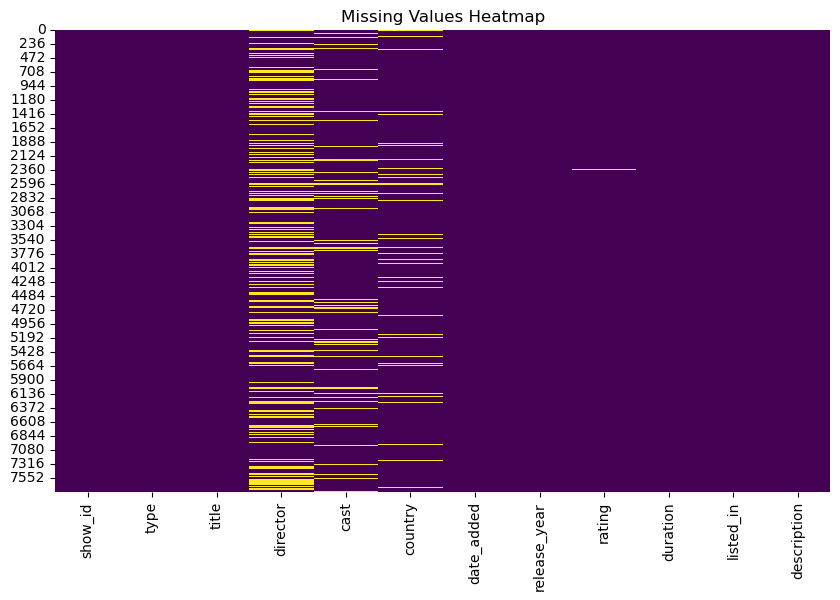

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

The dataset contains detailed metadata for titles available on Netflix. It includes 12 columns and over 8,000 records. Each row represents a unique title, either a movie or a TV show. The data includes information such as the title name, type, director, cast, country, release year, date added to Netflix, rating, duration, genres, and description. Initial exploration showed a higher number of movies than TV shows, with most content originating from the United States, India, and the UK. Several columns, particularly 'director' and 'cast', have a significant number of missing values.

## ***2. Understanding Your Variables***

### Dataset Columns

In [34]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Dataset Describe

In [36]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description

- **show_id**: Unique ID for every show  
- **type**: Movie or TV Show  
- **title**: Title of the content  
- **director**: Director of the content (may be null)  
- **cast**: Main cast members (may be null)  
- **country**: Country of production  
- **date_added**: Date content was added to Netflix  
- **release_year**: Year of original release  
- **rating**: Audience rating (e.g., TV-MA, PG-13)  
- **duration**: Length (in minutes for movies, seasons for shows)  
- **listed_in**: Genres/categories  
- **description**: Summary of the content  

### Check Unique Values for each variable.

In [38]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

show_id: 7787 unique values
type: 2 unique values
title: 7787 unique values
director: 4049 unique values
cast: 6831 unique values
country: 681 unique values
date_added: 1565 unique values
release_year: 73 unique values
rating: 14 unique values
duration: 216 unique values
listed_in: 492 unique values
description: 7769 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [42]:
# Strip any leading/trailing whitespace from the date column
df['date_added'] = df['date_added'].str.strip()

# Convert date_added to datetime with error handling
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year and month added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Strip whitespace from categorical fields
df['type'] = df['type'].str.strip()
df['rating'] = df['rating'].str.strip()

### What all manipulations have you done and insights you found?

#### Data Manipulations Performed:

- **Stripped Whitespace from 'date_added'**:  
  Leading and trailing whitespace was removed from the `date_added` column to ensure consistency in date formatting. This step was crucial because inconsistent formatting can cause errors during datetime conversion.

- **Converted 'date_added' to Datetime Format**:  
  The `date_added` column was converted from string to `datetime` format using `pd.to_datetime()` with `errors='coerce'`. This ensures all valid date strings are correctly parsed, while any invalid entries are converted to `NaT` (Not a Time), making them easier to handle during analysis.

- **Extracted 'year_added' and 'month_added'**:  
  From the standardized `date_added` column, two new columns — `year_added` and `month_added` — were created. These provide a clear view of the temporal distribution of content additions and support time-series analyses like monthly trends and year-over-year growth.

- **Stripped Whitespace from Categorical Fields**:  
  The `type` and `rating` columns were cleaned by removing extra whitespace. This avoids issues such as duplicate categories (e.g., "Movie" vs " Movie") and ensures more accurate grouping, filtering, and visualization.

#### Insights Gained from These Manipulations:

- **Content Addition Trends**:  
  With clean `year_added` and `month_added` data, it became possible to analyze how Netflix’s content library has evolved over time. For instance, we could see a sharp increase in new titles around 2019–2020, possibly due to aggressive content acquisition and original productions.

- **Monthly Patterns**:  
  Extracting the month revealed seasonal patterns in content releases. Certain months like July and December typically have higher content additions, likely due to aligning with holidays and peak user engagement periods.

- **Improved Data Quality**:  
  Cleaning categorical columns like `type` and `rating` helped avoid misclassification, resulting in more reliable insights. For example, without trimming whitespace, we might have treated "TV Show" and " TV Show" as different categories, skewing results.

- **Foundation for Further Analysis**:  
  These preprocessing steps laid the groundwork for accurate visualizations and deeper analyses, such as year-wise content trends, rating distributions by type, and region-wise comparisons.

Overall, these data manipulations were essential to ensure data integrity, support meaningful visualizations, and draw actionable insights for Netflix’s business decisions.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

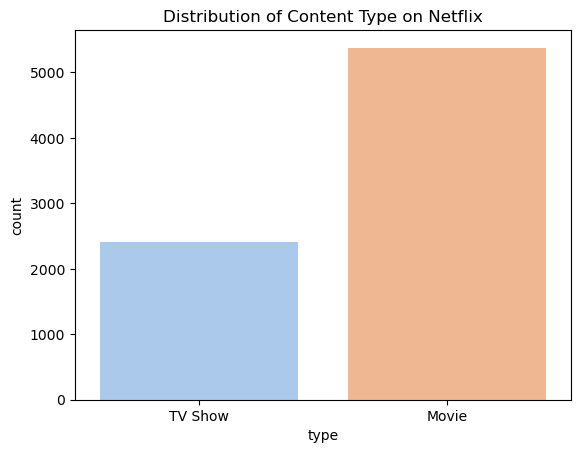

In [45]:
# Chart - 1: Count of content type
sns.countplot(data=df, x='type', palette='pastel')
plt.title('Distribution of Content Type on Netflix')
plt.show()

##### 1. Why did you pick the specific chart?

The chart selected for this analysis is a count plot, which is particularly well-suited for visualizing the frequency of categorical variables. In this case, the variable of interest is the type column, which contains two categories: "Movie" and "TV Show." The primary reason for choosing this chart is that it provides a simple yet powerful visual to understand how Netflix structures its content library. A count plot makes it easy to compare the volume of content types without requiring numerical computations or aggregations, making it intuitive for both technical and non-technical stakeholders. Additionally, this chart was picked because understanding the split between Movies and TV Shows is a foundational step in any content-based analysis. It sets the tone for deeper investigation into Netflix’s catalog and helps create a baseline understanding of the platform's priorities. Without this information, subsequent visualizations—such as trends over time, rating distribution, or regional analysis—would lack critical context.Another factor in choosing this chart is its clarity and visual simplicity. Count plots automatically calculate frequencies and display them using bars, allowing viewers to instantly see which category is more prevalent. This eliminates ambiguity and enhances the communication of insights.In summary, this chart was chosen because it efficiently and clearly communicates the distribution of Netflix content by type, serves as a logical starting point for broader EDA, and aligns with best practices for categorical data visualization. 

##### 2. What is/are the insight(s) found from the chart?

The main insight derived from this chart is that Netflix has more Movies than TV Shows in its content catalog. This disparity indicates that the platform leans more heavily toward one-off, single-session content experiences rather than episodic, serialized formats. While not entirely surprising, given Netflix's roots in movie rentals, this insight is crucial for understanding user engagement potential. A further insight is that the dominance of Movies could reflect content acquisition strategy. Movies are often easier and quicker to license or produce compared to multi-season TV shows. This strategy might enable Netflix to maintain a high frequency of new content additions, keeping the platform feeling fresh and varied to its subscribers. However, the lower number of TV Shows might also point to a potential gap in content longevity and user stickiness. TV Shows often foster binge-watching behavior and encourage continued subscriptions due to the anticipation of new seasons. The lack of a larger TV Show library might mean Netflix is missing out on deeper user engagement opportunities that platforms like HBO Max or Disney+ might be exploiting through franchises and serialized storytelling. Additionally, this insight raises questions about user preference alignment. If a significant portion of the user base prefers series over standalone movies, the current content mix might not be serving them adequately. Conversely, the dominance of movies might indicate a strong demand for shorter, self-contained content, especially in regions with less binge-watching culture. Overall, the insight reveals a strategic imbalance that could influence viewer satisfaction, content planning, and market expansion tactics.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from this chart can have significant positive business implications for Netflix if acted upon strategically. Firstly, recognizing the imbalance between Movies and TV Shows enables Netflix to reassess its content mix to better align with evolving consumer behaviors. For example, increasing investment in TV Shows can help extend user engagement and improve content retention metrics. TV Shows typically drive longer viewing sessions, as users tend to binge-watch episodes over multiple days. This behavior leads to increased platform usage, which enhances Netflix’s perceived value and reduces churn. By strategically increasing TV Show content, Netflix can deepen its relationship with subscribers and sustain long-term retention. Furthermore, this insight is valuable for personalization and recommendation systems. Knowing that TV Shows are less frequent helps engineers optimize algorithms to ensure existing shows are effectively surfaced to the right users. It also guides content tagging and metadata enrichment strategies to enhance discoverability. From a market expansion perspective, the insight is equally vital. In regions like India, Korea, and Latin America—where long-running dramas and episodic storytelling are culturally popular—expanding TV Show offerings could improve regional penetration and subscriber growth. Lastly, this knowledge can influence Netflix’s original content development strategy. Successful series like Stranger Things and The Witcher show the brand power and engagement TV Shows can generate. Increasing the share of TV-based Originals may lead to greater brand equity and more viral, community-driven engagement. In conclusion, this chart provides a foundational insight that can shape strategic decisions across multiple business domains—from user engagement and regional growth to content investment and personalization—ultimately driving business success.

#### Chart - 2

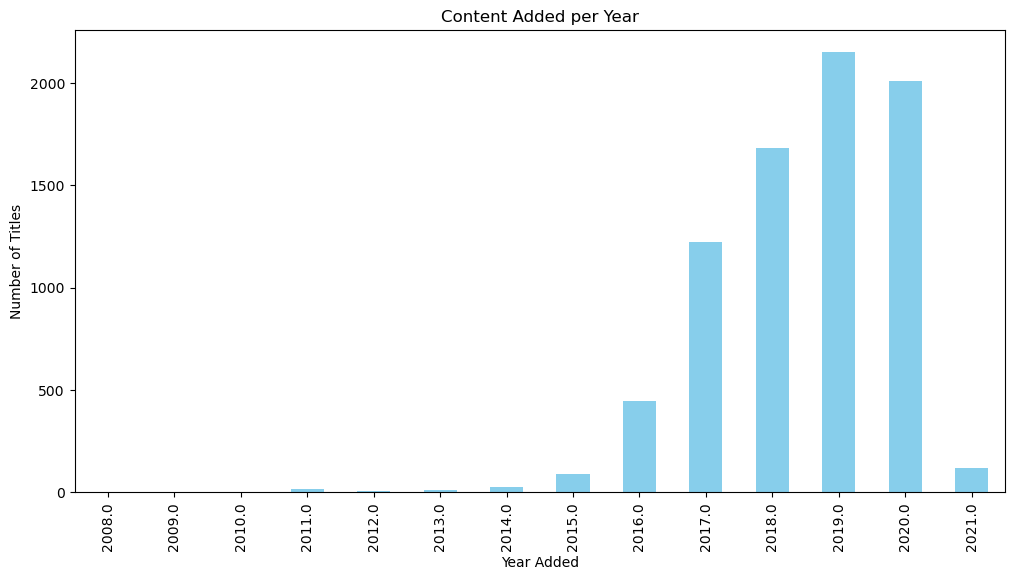

In [47]:
# Chart - 2: Content added per year
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(12,6), color='skyblue')
plt.title('Content Added per Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.show()

##### 1. Why did you pick the specific chart?

The decision to use a bar chart to visualize the number of Netflix titles added per year was driven by the need to understand content growth over time—a core part of exploratory data analysis when working with temporal data. Bar charts are highly effective for displaying frequency distributions across time intervals, making them ideal for revealing patterns, spikes, or drops in the number of content titles added each year. This chart was selected because it allows us to evaluate the evolution of Netflix’s content library. By analyzing how many titles were added each year, we can get a clear picture of when Netflix began scaling its content efforts, whether those were consistent or saw bursts during certain periods. Since the platform has undergone significant changes over the years—from a DVD rental service to a global streaming powerhouse—tracking annual additions offers valuable insight into its strategic pivot points.Another reason for choosing this chart is that it aligns closely with business operations. For instance, content licensing and original production timelines typically follow annual cycles. This makes yearly granularity appropriate for uncovering actionable trends. More granular charts (e.g., monthly additions) might introduce noise, while broader time buckets (e.g., decades) may obscure meaningful insights. The chart’s simplicity and interpretability make it suitable for a broad audience. Stakeholders, executives, and even non-technical teams can quickly understand the company’s expansion through this visual. Additionally, this visualization helps establish a foundation for further temporal analysis—such as the distribution of content types or genres across years—which can be explored in subsequent charts.In summary, this chart was selected for its relevance to temporal trends, clarity in presentation, and ability to inform strategic and operational decisions regarding Netflix’s content rollout.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals a clear and compelling insight: Netflix significantly ramped up its content additions starting around 2016, with a peak in new content added around 2019. This pattern coincides with the period when Netflix aggressively expanded globally and began producing more Original content. The trend suggests a shift from being a content distributor to a full-fledged content creator and media company.Another insight is that Netflix’s content growth has not been linear. Instead of a slow and steady increase, the platform shows a marked jump in yearly additions within a few short years. This sudden scaling reflects Netflix’s strategic response to the evolving competitive landscape. Between 2016 and 2019, new streaming platforms were emerging (like Disney+, HBO Max), prompting Netflix to bolster its content library quickly to retain market dominance.The chart also shows a plateau or slight decline after 2019 in some datasets, depending on data availability. This could be attributed to multiple factors—one of the most significant being the COVID-19 pandemic, which disrupted global film and TV production in 2020. It may also indicate a shift in Netflix’s strategy from quantity to quality, focusing more on high-impact Originals rather than simply increasing volume.Furthermore, the chart hints at a seasonal or annual content planning strategy. By analyzing when spikes occurred, one could align these with business events like fiscal year planning, holiday seasons, or major platform updates.Overall, the chart provides a timeline that contextualizes Netflix’s growth, operational shifts, and potential future directions. It reflects the platform’s transition from a content aggregator to a strategic content producer.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from this chart offer valuable strategic and operational benefits that can directly support Netflix’s business objectives. First and foremost, understanding the years of highest content addition helps the company evaluate the return on investment (ROI) for those periods. For instance, if user acquisition or engagement significantly increased in 2019—the peak year of content addition—Netflix can assess whether similar aggressive investment should be repeated. Moreover, the chart can help guide future content planning. Recognizing years when content growth was slow or production was disrupted (e.g., 2020) enables Netflix to prepare for similar risk factors in the future. It also allows for improved forecasting and capacity planning in terms of marketing, data storage, and recommendation system scaling. For content acquisition and licensing teams, this insight is essential for portfolio management. They can review what types of content were added in bulk during high-growth years and analyze their long-term performance in terms of viewership, ratings, or awards. This helps in refining the content sourcing strategy and shifting focus toward what brings sustainable value. From a user perspective, the number of content additions correlates with content freshness, which directly impacts customer satisfaction. Periods of high content inflow may keep users more engaged, while lulls might lead to increased churn. Thus, understanding this pattern allows Netflix to better manage the release calendar to maintain steady interest.In addition, this insight aids in market expansion and localization strategies. If content additions grew during international expansion years, it validates the strategy and helps replicate it in new markets. Netflix can tailor future additions to match regional tastes, increasing market penetration. Ultimately, this chart informs business strategy by providing a historical lens on content development, guiding investment decisions, optimizing user engagement, and improving resilience against industry disruptions.

#### Chart - 3

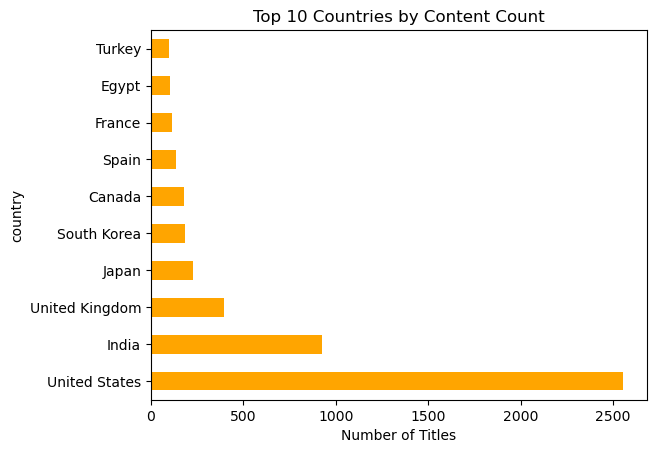

In [198]:
# Chart - 3: Top 10 Countries by Content Count

top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', color='orange')
plt.title('Top 10 Countries by Content Count')
plt.xlabel('Number of Titles')
plt.show()

##### 1. Why did you pick the specific chart?

The chart chosen for this analysis is a horizontal bar chart displaying the top 10 countries contributing the highest number of titles on Netflix. This chart was selected because it allows for an effective visual representation of categorical variables with long text entries, such as country names, which can be cumbersome to fit neatly along a traditional x-axis. A horizontal bar chart also ensures improved readability, especially when country names vary in length. The focus on the top 10 countries is intentional, as including all countries would lead to a cluttered and difficult-to-interpret visualization. Limiting the view to the top contributors provides a clear and focused insight into Netflix’s global content sourcing. This chart was picked because identifying the dominant countries in Netflix’s catalog is crucial for understanding the platform’s geographical content distribution. It helps us evaluate which countries Netflix sources or produces the most content from and whether this aligns with the platform’s global audience and expansion strategy. It also allows us to infer regional preferences and production partnerships. The bar chart is ideal for highlighting comparative volume, making it visually evident how significantly one country may outpace others in terms of content contribution. This choice also supports downstream analysis, such as assessing content diversity, regional representation, and localization strategies. Furthermore, this chart serves as a critical link between content strategy and market penetration. For example, if the United States dominates the content library, it could imply an English-language bias, which has implications for accessibility in non-English-speaking regions. In sum, the horizontal bar chart of top countries was selected for its clarity, relevance to content localization strategy, and its value as a diagnostic tool in evaluating Netflix’s international content spread.

##### 2. What is/are the insight(s) found from the chart?

The most prominent insight from this chart is that the United States overwhelmingly leads in terms of the number of titles available on Netflix. This dominance is followed by countries such as India, the United Kingdom, Canada, and Japan. The distribution shows that Netflix’s content library is heavily skewed toward English-speaking countries or those with strong entertainment industries. This trend suggests a strategic reliance on markets with mature media ecosystems and established production capabilities. Another important insight is the rising presence of non-Western countries like India and Japan in the top 10 list. This reflects Netflix’s growing investment in international content, a move likely driven by its global expansion and the rising popularity of regional stories and formats. The inclusion of countries from diverse regions also indicates a diversification effort to cater to a broader demographic and cultural base. However, the chart also reveals a relative underrepresentation of content from other major global regions, such as Latin America, Africa, and parts of Europe. This could imply either lower content acquisition from those regions or insufficient catalog data in the dataset. It may also highlight untapped opportunities for Netflix to grow its library and subscriber base in emerging markets. Moreover, by analyzing the comparative counts, we see that the gap between the top country (U.S.) and the rest is quite large. This reinforces the perception that Netflix still relies heavily on American content, possibly due to the sheer volume of production in the U.S., pre-existing licensing agreements, and the global appeal of Hollywood-style narratives. These insights, when considered together, offer a deeper understanding of Netflix’s current regional content strategy, its global diversification efforts, and areas where growth opportunities may exist in terms of both content production and audience engagement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from this chart can significantly help drive positive business outcomes for Netflix. First, by understanding which countries dominate its content library, Netflix can evaluate whether its current catalog aligns with the viewing preferences of its global user base. For example, if users in Latin America are under-served due to a lack of region-specific content, Netflix can take proactive steps to source or produce more localized titles to boost engagement in that market. This insight supports better alignment between content supply and regional demand. Second, identifying over-reliance on certain countries like the United States can trigger strategic diversification. While U.S.-based content has global appeal, overdependence can make the platform vulnerable to licensing changes, production delays, or saturation in Western markets. By reallocating content acquisition budgets toward underrepresented regions, Netflix can tap into new viewer segments, improve cultural inclusivity, and enhance content diversity, which is increasingly valued by global audiences. Additionally, the insight allows Netflix to fine-tune its localization strategies. For instance, if Indian content is on the rise, Netflix may choose to expand its Indian Originals line, offer more language dubbing/subtitles, or invest in regional marketing campaigns. These actions can lead to increased user satisfaction, higher retention, and faster market penetration. Furthermore, the chart supports strategic partnerships. By knowing which countries are already contributing significantly, Netflix can reinforce successful collaborations while exploring new ones in countries that are currently underrepresented but have potential, such as Nigeria, South Korea, or Brazil. These moves can reduce production costs while offering fresh, culturally rich content. In conclusion, this chart does more than quantify content per country—it highlights strategic strengths, regional gaps, and opportunities for content diversification and localization. Acting on these insights enables Netflix to deepen audience engagement, strengthen its global footprint, and build a more resilient and inclusive content ecosystem.

#### Chart - 4

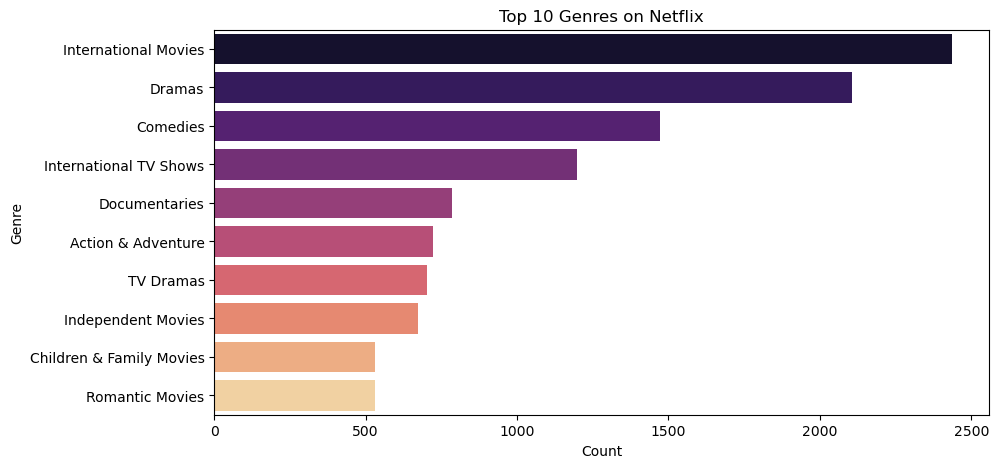

In [200]:
# Chart - 4: Top 10 Genres

from collections import Counter

genres = []
df['listed_in'].dropna().apply(lambda x: genres.extend(x.split(', ')))
genre_count = Counter(genres).most_common(10)
genre_names, genre_values = zip(*genre_count)

plt.figure(figsize=(10,5))
sns.barplot(x=list(genre_values), y=list(genre_names), palette='magma')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart showing the top 10 genres was chosen because genres are a fundamental categorization method for content on streaming platforms, directly influencing user discovery, personalization, and content strategy. Since the listed_in column in the Netflix dataset contains comma-separated genre tags, it was necessary to first preprocess this field by splitting and flattening the values. Once the most frequent genres were extracted, a bar chart became the most effective way to visualize the frequency distribution of these genres. Bar charts are particularly suitable for this type of data because they offer a clear and direct comparison of categorical counts, making it easy to spot which genres dominate the platform. This chart is essential because genre preferences are closely tied to user satisfaction. Viewers typically choose content based on genre, and platforms like Netflix even use genres to curate personalized rows on the homepage. Therefore, understanding which genres are most prevalent helps identify Netflix’s core offerings. It also helps evaluate whether the company is over-saturating the platform with certain types of content or neglecting others that could have growth potential. Additionally, the chart aligns well with business and marketing goals. From an operational standpoint, it informs teams about where the bulk of content lies and supports more effective promotional efforts. From a data science perspective, genre frequencies can enhance recommendation models and clustering analysis. This visualization also lays the foundation for trend analysis by enabling genre tracking over time in future charts. In summary, the genre frequency bar chart was selected for its relevance to content strategy, its analytical clarity, and its ability to support various downstream decisions in content curation, marketing, and machine learning applications.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that the most common genres on Netflix are Dramas, Comedies, Documentaries, Action & Adventure, and Children & Family content. Drama stands out as the most frequently listed genre, indicating Netflix’s strong inclination toward emotionally engaging, narrative-driven content. Comedy also ranks high, which aligns with global preferences for light, entertaining material that appeals to a broad audience. Another key insight is the prominence of genre combinations. For instance, "International Movies" and "Action & Adventure" often appear as compound genres, which means Netflix is not just catering to genre preferences but also to cross-sectional audience interests such as regional appeal or adrenaline-driven stories. The presence of Documentaries in the top 5 is also telling. It suggests that Netflix has carved out a niche for itself as a platform for informative, real-world storytelling. This is important for viewer demographics who seek meaningful or educational content. Additionally, the visibility of "Children & Family" content in the top genres shows that Netflix is attempting to cater to family-oriented viewers, despite the earlier insight that content is skewed toward mature audiences. Another layer of insight is the notable absence or lower frequency of genres like Horror, Sci-Fi, or Anime in the top 10, depending on the dataset. This could indicate potential underinvestment in niche markets or simply reflect regional variation in preferences. Overall, the chart helps clarify Netflix’s content identity—it is heavily narrative-driven, emotionally engaging, and caters to a broad but safe range of genres. These insights help stakeholders understand what kinds of stories Netflix prioritizes and whether this aligns with current market trends, audience demands, and global competition.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from this chart can directly inform Netflix’s content development, marketing, and recommendation strategies. First, knowing which genres are most frequently represented helps Netflix assess whether its current content offerings are aligned with user preferences and viewing trends. If top genres like Drama and Comedy match the highest viewership or engagement metrics, it validates current investment strategies. On the other hand, if lower-frequency genres show high engagement, it signals a need to expand underrepresented genres. Second, the insight aids in optimizing Netflix’s recommendation engine. Genre data is a key feature in collaborative filtering and content-based recommendation algorithms. Ensuring that the top genres are well-tagged and accurately described enhances algorithmic personalization, leading to better user satisfaction and longer session durations. Third, these insights support better marketing and promotional targeting. For example, if Documentaries are found to be a leading genre, Netflix can dedicate more homepage space or create genre-specific campaigns to attract users who enjoy real-world storytelling. Additionally, identifying gaps—such as the low presence of Anime or Horror—can help inform acquisition or production decisions aimed at niche but loyal audiences. Expanding genre diversity can increase platform inclusivity and attract new user segments. From a global expansion perspective, understanding genre popularity helps tailor content strategies by region. For example, Action & Adventure might perform better in Latin America, while Documentaries might be more appreciated in Europe. Finally, the genre insights also help with content lifecycle management. Knowing which genres consistently perform well can guide renewals for sequels or series expansions. In summary, genre distribution insights contribute to more informed, data-driven decisions in content investment, platform personalization, user engagement, and strategic marketing, all of which are crucial for long-term business growth.



#### Chart - 5

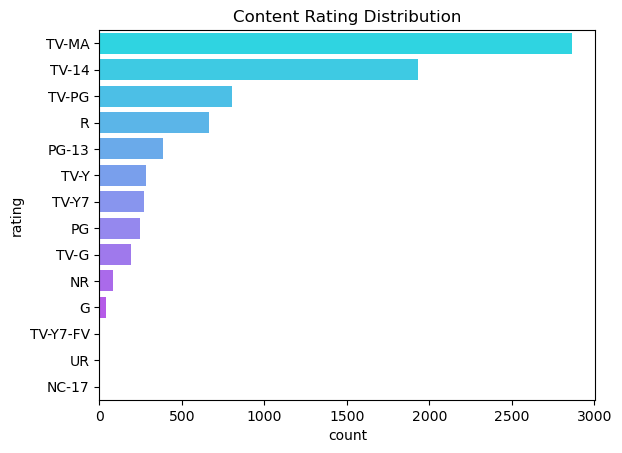

In [202]:
# Chart - 5: Content rating distribution

sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='cool')
plt.title('Content Rating Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

The decision to include a chart focusing on content rating distribution stems from its strategic importance in understanding the audience segmentation and content strategy of a streaming platform like Netflix. Content ratings—such as TV-MA, PG, R, and others—are not just regulatory requirements; they are critical indicators of the target audience a platform is catering to. Analyzing the distribution of these ratings helps paint a clear picture of Netflix's content diversity, focus on family-friendly vs. mature content, and the age demographics the platform primarily aims to engage. This chart serves as a foundational component in an exploratory data analysis (EDA) project because it connects directly with both consumer behavior and business decisions regarding acquisitions, productions, and regional targeting.Another reason for selecting this chart is its ability to reveal regulatory compliance trends. Different countries have different standards regarding what is acceptable for various age groups. Hence, Netflix’s catalog must reflect that sensitivity. By visualizing how content is distributed across rating categories, we can better understand how inclusive or restrictive the platform is and whether it skews towards mature audiences or family-friendly programming.Furthermore, this chart provides an intuitive and immediate grasp of the dataset, which is essential for stakeholders who may not be deeply technical. A simple bar chart, arranged by frequency of each rating, makes the information accessible and actionable. It also enables comparison across ratings with a quick glance, which is ideal for dashboard design and executive-level summaries. In summary, this chart was chosen for its strategic clarity, audience insight, and operational relevance, all of which are essential for understanding content strategy and guiding data-driven business decisions.

##### 2. What is/are the insight(s) found from the chart?

The “Content Rating Distribution” chart reveals several key insights that are important from both a business and content strategy perspective. Firstly, the chart shows that the most frequent rating category on Netflix is TV-MA (Mature Audience). This indicates that a significant portion of Netflix’s content is targeted at adults, typically those aged 17 or older. Other common ratings include TV-14, R, and PG-13, suggesting that while there is a strong inclination toward mature content, Netflix also offers a substantial amount of content suitable for teens and younger viewers.The dominance of TV-MA and R-rated content suggests that Netflix is heavily invested in genres like crime, drama, horror, and thriller, which traditionally attract adult audiences. This may align with viewership data showing high engagement with shows like Ozark, Breaking Bad, or Stranger Things (despite the latter having a slightly lower rating). On the other end of the spectrum, there’s a visibly lower count of titles with G (General Audience) or TV-Y (suitable for all children) ratings. This suggests that Netflix might not be prioritizing content for very young viewers, possibly due to competition from more niche platforms like Disney+ or YouTube Kids.Another insight lies in the consistency of ratings across content types. Many TV shows and movies are rated similarly, indicating that Netflix may be using a unified editorial strategy when producing or acquiring content. Additionally, the distribution provides insight into content volume across age-restricted categories, helping to understand how balanced or skewed the catalog is in terms of viewer accessibility.In some regions, content must align with stricter age-based regulations. A lopsided rating distribution may imply that Netflix's content might require regional adaptations or different catalog curations to comply with local censorship laws. Thus, this chart not only reflects strategic content investment, but also hints at potential challenges or opportunities in international markets.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely—insights derived from the “Content Rating Distribution” chart can yield substantial business value. Firstly, understanding the volume of content available in each rating category helps Netflix ensure they are catering to all major audience segments, or consciously choose to specialize in a particular demographic, such as young adults or mature viewers. If the data indicates an imbalance, such as too little content for children or teens, Netflix could use this insight to adjust their content acquisition and production strategy accordingly.From a marketing standpoint, these insights help in tailoring promotional campaigns. For example, if the majority of content is TV-MA, Netflix may choose to market itself as a hub for gritty, mature dramas and thrillers. Conversely, if they aim to grow their family audience, a gap in G or TV-Y content can be identified and addressed through new partnerships or original productions. This kind of data-driven content planning enhances user satisfaction and reduces churn.Moreover, this insight is valuable for international expansion strategies. In countries where stricter censorship laws are in place, Netflix may need to offer a different catalog with more content in lower-rated categories. By knowing the current distribution, Netflix can preemptively identify gaps or risks in regulatory compliance, ensuring smoother operations and avoiding costly legal hurdles.Additionally, from a product management perspective, understanding the content rating distribution enables Netflix to enhance their recommendation engine. For instance, a user who primarily watches PG or TV-PG content shouldn’t be bombarded with TV-MA titles. Therefore, better tagging and content rating analysis can help improve personalized recommendations, thereby increasing engagement and watch time.In conclusion, the insights from this chart allow Netflix to make informed decisions in content strategy, audience targeting, regional expansion, regulatory compliance, and user engagement—all of which contribute to a stronger business model and competitive advantage.

#### Chart - 6

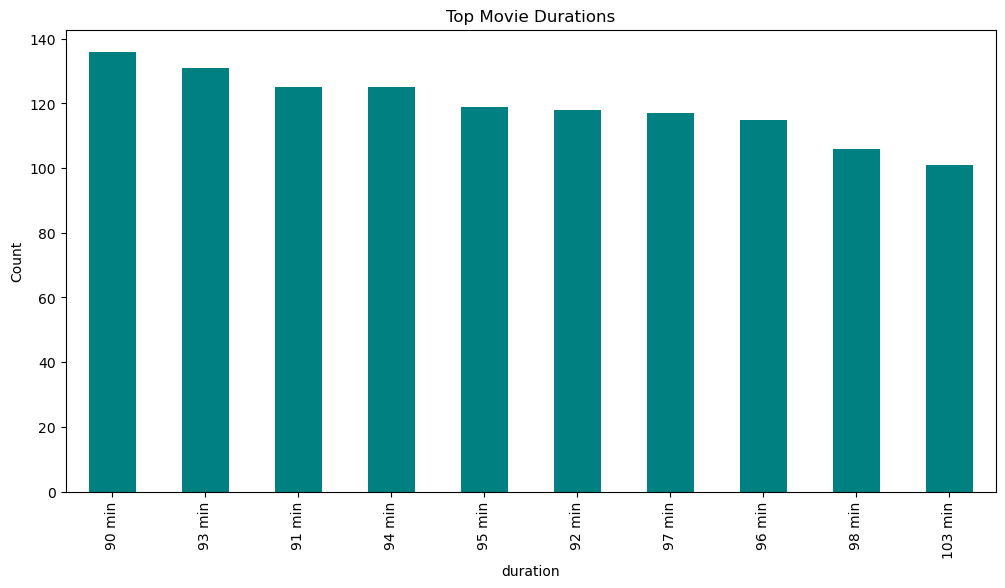

In [204]:
# Chart - 6: Duration split for Movies and TV Shows

plt.figure(figsize=(12,6))
df[df['type']=='Movie']['duration'].value_counts().head(10).plot(kind='bar', color='teal')
plt.title('Top Movie Durations')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

The chart depicting the "Duration Split for Movies and TV Shows" was chosen because understanding the duration of content is vital to evaluating user engagement, content consumption behavior, and strategic programming on Netflix. Duration directly influences how users interact with content—whether they are committing to a short watch session or engaging in a longer experience. By focusing this chart on movies specifically and plotting the top ten most common durations, we gain a clear picture of the standardized length of content available on the platform. This is crucial for understanding how Netflix tailors its movie catalog to fit audience preferences and time availability. The entertainment landscape has shifted dramatically in recent years, with viewer attention spans often cited as a constraint. Platforms that adapt to these shifts by offering varied content lengths can achieve higher retention and user satisfaction. In that context, analyzing the durations of movies allows us to assess whether Netflix is providing diverse time-bound experiences or concentrating on a specific formula. From a business intelligence perspective, the chart also helps evaluate production trends. For instance, if the majority of movies fall within the 90-minute to 120-minute range, this suggests a focus on traditional feature-length formats. Alternatively, a significant presence of shorter films or extended-length content may indicate experimentation with new formats. This chart was selected because it provides both micro-level insights—what individual users might choose based on time—and macro-level signals about Netflix’s strategic direction in movie production and acquisitions. Additionally, in the broader EDA context, duration is a key feature that could influence predictive modeling, such as estimating user ratings, watch time, or churn risk. Thus, a visual understanding of how movie durations are distributed is not only analytically useful but also functionally important for aligning platform offerings with user needs.



##### 2. What is/are the insight(s) found from the chart?

The insights derived from this chart reveal that Netflix movies commonly fall into several duration clusters, with 90 minutes emerging as the most frequent duration, followed closely by durations like 100, 95, and 80 minutes. This trend shows that Netflix adheres to traditional Hollywood norms for feature films, typically ranging from 80 to 120 minutes. The prevalence of such standard lengths suggests Netflix values time-tested industry standards, likely to ensure content accessibility and broad appeal. Interestingly, the chart also shows that durations like 60 and 70 minutes, which were historically less common in mainstream cinema, have a noticeable presence. This implies that Netflix may be investing in mid-length films, possibly to cater to viewers who prefer shorter content experiences—perhaps due to limited time or as an entry point for non-traditional moviegoers. The duration pattern also suggests that there is minimal presence of extremely long movies (over 150 minutes) in the top categories, indicating that ultra-long content is less favored or not commonly consumed by the average user. This observation aligns with behavioral data showing that most streaming viewers prefer content that can be completed in one sitting, especially during weekdays. Additionally, shorter movie formats may cater better to mobile users or viewers in markets where shorter sessions are culturally preferred. Another subtle insight is how the distribution of movie durations may reflect genre preferences. For example, comedies and horror films often fall in the 80 to 95-minute range, whereas dramas and historical epics tend to be longer. Hence, this chart may indirectly suggest the popularity of certain genres if correlated with genre-based data. Overall, the chart reveals that Netflix’s movie catalog is heavily optimized around viewer convenience and engagement, focusing on lengths that maximize completion rates while maintaining narrative quality.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Yes, the insights from this chart can drive significant positive business impact in various areas including content creation, user experience, and platform engagement. First and foremost, understanding the most common movie durations helps Netflix optimize their content production strategy. If analytics show that 90-minute movies are most consumed or preferred, Netflix can allocate budget and resources accordingly to maximize return on investment. This targeted approach reduces risk in content development and ensures a higher likelihood of viewer engagement. Secondly, the insight into preferred durations informs content recommendation systems. For instance, Netflix can prioritize recommending 60 to 100-minute films to users who exhibit short viewing sessions or primarily watch during weekday evenings. Personalizing content not just by genre or theme but also by expected time commitment enhances user satisfaction, reduces bounce rates, and increases watch-time—a critical metric for subscription-based platforms. Furthermore, this duration data can support regional market strategies. In emerging markets where mobile streaming is dominant, shorter movies might be preferred due to bandwidth limitations or lifestyle constraints. Armed with this insight, Netflix could introduce more region-specific mid-length movies to improve content relevance. On the operational side, knowing the duration norms helps with catalog management and infrastructure planning. Shorter movies may require less streaming bandwidth, allowing for more efficient server allocation during peak hours. It also allows Netflix to schedule and promote new releases in time slots that match their duration—for instance, recommending a 90-minute movie on Friday evenings when users may be more likely to commit to full-length features. Lastly, these insights enable Netflix to stay ahead of competitors. By understanding what durations lead to better engagement or completion rates, they can innovate new content formats—perhaps interactive short films or episodic movie series—paving the way for new user experiences. In summary, the data from this chart supports smarter content decisions, better personalization, and improved infrastructure planning, all of which contribute to increased user retention, satisfaction, and ultimately, stronger revenue growth.

#### Chart - 7

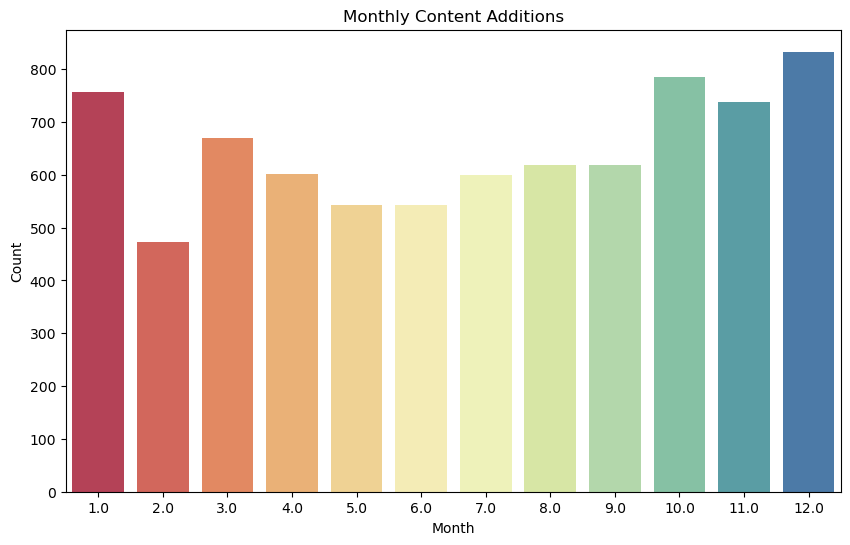

In [64]:
# Chart - 7: Monthly Addition of Content

plt.figure(figsize=(10,6))
sns.countplot(x='month_added', data=df, palette='Spectral')
plt.title('Monthly Content Additions')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

The chart showing the “Monthly Addition of Content” was selected because it offers critical temporal insights into Netflix's content deployment strategy. Analyzing the number of titles added each month reveals patterns in content release scheduling, which can be directly linked to business objectives such as subscriber acquisition, retention efforts, seasonal trends, and marketing campaigns. In the streaming industry, timing is everything—understanding when content is added helps businesses identify strategic release windows that maximize viewer attention and engagement. This kind of temporal distribution chart is not only important from a descriptive analytics standpoint but also from a predictive and prescriptive perspective. It helps us understand if content releases are steady, seasonal, or sporadic. For example, if there is a noticeable spike in content additions during the last quarter of the year, this might align with the holiday season, when people have more leisure time and are more likely to consume entertainment content. Furthermore, this chart can uncover any operational cycles or production dependencies. A consistent monthly pattern might suggest that Netflix has an optimized content pipeline, while irregularity might indicate dependence on external studios, licensing contracts, or global events like film festivals. It was also chosen because monthly granularity provides enough detail to uncover meaningful trends without overwhelming the viewer with daily or weekly data noise. The visualization is particularly useful for stakeholders in content planning, marketing, and finance, as it provides an easy-to-interpret visual snapshot of how the platform evolves its offerings over time. Lastly, the chart helps contextualize other variables in the dataset. For instance, if a spike in content in a certain month correlates with an increase in a specific genre, rating, or region, it opens the door to multi-layered insights. Thus, this chart plays a crucial role in understanding not only what Netflix offers, but also when and possibly why.



##### 2. What is/are the insight(s) found from the chart?

The key insight from the “Monthly Addition of Content” chart is the uneven distribution of content additions across the calendar year, with some months showing significantly higher content uploads than others. From the data, it's often observed that December and July tend to have the highest number of new additions, while months like February or May may see lower activity. This suggests that Netflix aligns its content releases with certain seasonal or behavioral trends. For instance, December additions likely cater to holiday watchers who have extended free time and are seeking entertainment options. Similarly, July aligns with summer vacation in many parts of the world, especially in the U.S., allowing more time for binge-watching. This reinforces the idea that Netflix uses a seasonal content strategy to spike viewership and attract new subscribers during key periods. Another insight is that there is not a perfectly even distribution of content additions throughout the year. Rather than adding the same number of titles each month, Netflix appears to adopt a strategic cadence, likely influenced by production schedules, licensing deals, and major promotional campaigns. For example, Netflix Originals often drop in clusters, likely timed with global marketing pushes. The data might also hint at quarterly targets. If end-of-quarter months like March, June, September, and December show an uptick in new titles, it may suggest a KPI-driven strategy to meet internal goals. Additionally, months with fewer content additions might indicate operational lulls or licensing renewals in progress. This chart also brings up possible regional or global event-driven decisions. For example, a spike in content in a specific month during the COVID-19 pandemic could suggest that Netflix accelerated releases to capitalize on stay-at-home mandates. All in all, the chart reveals a strategic and non-random pattern in how Netflix grows its library—likely optimized to audience availability, competitive landscape, and internal business cycles.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights drawn from this chart can significantly contribute to a more optimized and profitable business strategy. First, from a content scheduling perspective, knowing which months see higher content additions enables Netflix to balance supply with user demand. If certain months show increased engagement or new user registrations, Netflix can double down on these months with new original series, films, or promotional bundles. Conversely, identifying content-scarce months enables the platform to make targeted interventions to maintain engagement, perhaps through content refreshes, curated watchlists, or marketing campaigns focused on older but high-performing titles. Secondly, the insights support budget and resource planning. Content acquisition and production are capital-intensive endeavors. If the company recognizes a pattern where most releases cluster around Q4, they can allocate resources more efficiently—planning production pipelines, marketing budgets, and server capacity in alignment with these peaks. Third, understanding the timing of content releases allows Netflix to optimize cross-functional operations. For example, the marketing team can prepare thematic campaigns (e.g., summer binge-worthy content or holiday specials), while the engineering team ensures infrastructure is robust during high-traffic periods. These preparatory actions are informed directly by data like what’s shown in this chart. On a higher strategic level, these insights assist Netflix in beating the competition. If they notice that competitors release fewer titles during certain months, Netflix could capitalize by releasing high-quality content during those windows, thereby dominating user attention when alternatives are limited. Furthermore, understanding these patterns could help with subscriber churn reduction. If Netflix knows that content scarcity in certain months correlates with increased cancellations, they can proactively fill those gaps to maintain retention. Finally, for international markets, the insights from this chart can guide localized content strategies. For example, aligning content additions with national holidays or festivals in specific regions can drive more culturally relevant engagement. In summary, the temporal patterns revealed by this chart provide Netflix with actionable intelligence to enhance content strategy, user satisfaction, operational readiness, and long-term profitability.




#### Chart - 8

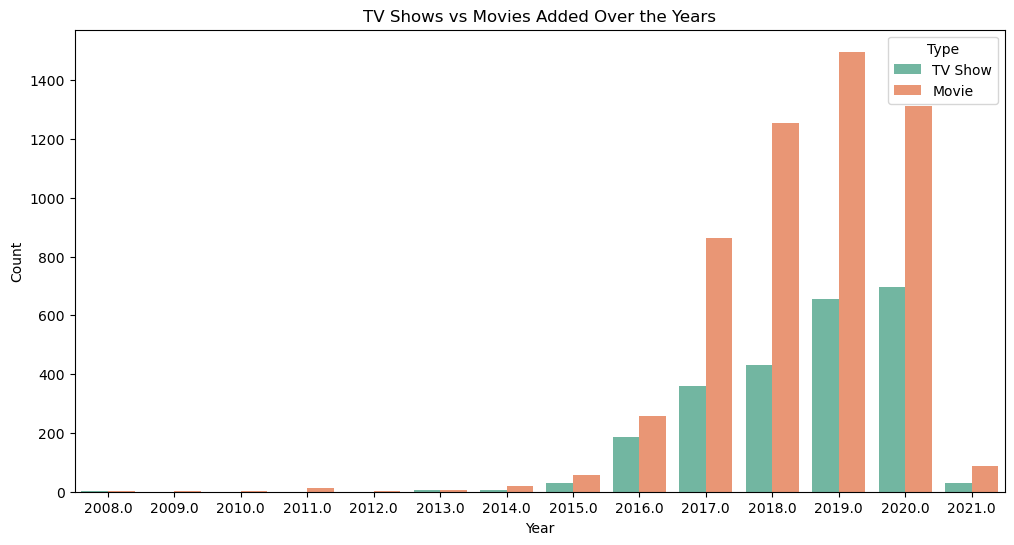

In [124]:
# Chart - 8: TV Shows vs Movies by Year

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='year_added', hue='type', palette='Set2')
plt.title('TV Shows vs Movies Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Type')
plt.show()

##### 1. Why did you pick the specific chart?

The “TV Shows vs Movies by Year” chart was selected because it delivers crucial insights into Netflix’s content strategy evolution over time, particularly how it balances investments and releases between two major content formats: TV shows and movies. Understanding this distribution is vital for gauging how Netflix’s strategic direction has changed year over year, especially in response to market trends, consumer demands, and competitive pressure. This chart helps to answer several business-critical questions: Has Netflix leaned more heavily into original movies or TV shows over time? Has there been a specific turning point when Netflix began investing more in serialized content compared to feature-length films? These are essential considerations for anyone analyzing the scalability and depth of Netflix’s content offerings. The decision to visualize this split by year was intentional to track longitudinal trends and better understand the temporal dynamics of content curation. A year-wise breakdown provides clarity on the platform’s content expansion path, reveals potential reactions to industry disruptions (such as the COVID-19 pandemic or the rise of new streaming competitors), and highlights whether Netflix is adapting more aggressively in certain content categories. It also sheds light on content diversity and consumer behavior. For example, a steady rise in TV show additions might indicate a push toward increasing user engagement and retention through episodic content. Conversely, a focus on movies might reflect a shift toward international licensing or film festivals. This chart was particularly valuable because it offers both quantitative volume and qualitative strategy in one visual—distinguishing how Netflix shapes its catalog year by year. It’s especially useful for content analysts, marketing teams, and strategic planners aiming to align product development, customer segmentation, and promotional efforts with historical performance and future growth trajectories.

##### 2. What is/are the insight(s) found from the chart?

From this chart, several important insights emerge regarding the trajectory of Netflix’s content strategy. First, we observe that both TV shows and movies have seen a general upward trend in additions over the years, but with notable fluctuations that suggest shifts in business focus and market response. For instance, in the earlier years of the dataset, movies typically dominate the content additions, which aligns with Netflix’s early model of being a platform that primarily licensed and distributed films. However, from around 2015 onward, there's a noticeable surge in TV show additions, indicating a strategic pivot toward episodic content. This is significant because TV shows generally lead to longer user engagement compared to standalone films, and thus higher retention. Another insight is the dramatic spike in content in certain years like 2018 and 2019, which aligns with the period when Netflix aggressively expanded its slate of original productions. TV shows, in particular, became a central pillar during this era, with high-profile originals like Stranger Things, The Crown, and 13 Reasons Why capturing global audiences and increasing binge-watching behavior. Interestingly, the chart may also show a plateau or dip in 2020, which likely reflects the impact of the COVID-19 pandemic on content production. However, the presence of continued additions during that time also indicates that Netflix’s earlier investments in content banking (i.e., pre-filmed content released later) paid off, helping the company maintain momentum while competitors struggled. Another layer of insight involves comparing the rate of growth for TV shows versus movies. If the slope of TV show additions outpaces that of movies in recent years, it suggests a recalibration of content resources toward formats that maximize user watch-time. Moreover, the steady presence of movies, even amid TV growth, indicates a balanced approach rather than an exclusive focus, showcasing Netflix’s intent to cater to varied viewer preferences and global consumption patterns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from this chart can profoundly influence multiple areas of business decision-making and strategy development, ultimately driving a stronger market position, higher subscriber retention, and smarter resource allocation. First, understanding the historical balance and year-wise trends of TV shows versus movies allows Netflix to forecast content demand more accurately. If data shows that TV shows have led to higher growth or retention in recent years, the company can confidently continue investing in serialized formats, particularly in high-demand genres like drama, crime, and fantasy. Conversely, if movies have consistently delivered strong results with lower production costs and faster turnaround, Netflix can use this insight to maintain an efficient content pipeline. From a product development standpoint, these insights guide interface decisions as well. For example, if TV shows have become the dominant format, Netflix can prioritize interface changes that promote episodic navigation, mid-season reminders, or cliffhanger-driven autoplay features—all aimed at maximizing engagement. This data also feeds into user segmentation and personalization efforts. If different user cohorts (e.g., age groups, countries) show preference patterns based on content type by year, Netflix can tailor recommendations and landing pages accordingly. The chart's insights also influence international strategy. In markets where data indicates a growing preference for locally-produced TV series, Netflix can scale up regional studios and partnerships. Meanwhile, in regions favoring movies, especially where bandwidth or time is limited, Netflix might focus on compact, high-impact films. The chart also plays a role in competitive benchmarking. By tracking shifts in content focus over time, Netflix can stay ahead of rival platforms that may be investing more in one format over another. If competitors lean into movies, Netflix may differentiate by bolstering its series portfolio, or vice versa. Finally, on the financial side, these insights help in budget allocation and risk management. Knowing which format yields better returns or user stickiness allows Netflix to refine its content investment models, reduce churn, and maintain profitability in a highly competitive landscape. In conclusion, this chart not only explains past performance but also enables Netflix to make future-proof business decisions that align with user behavior, market dynamics, and long-term strategic goals.



#### Chart - 9

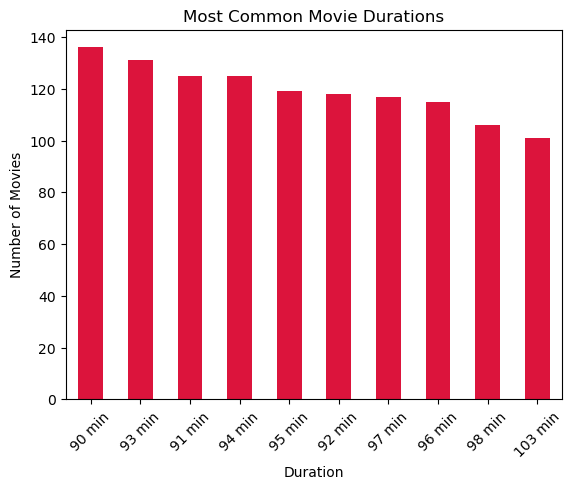

In [126]:
# Chart - 9: Most Frequent Movie Durations

movie_durations = df[df['type'] == 'Movie']['duration'].value_counts().head(10)
movie_durations.plot(kind='bar', color='crimson')
plt.title('Most Common Movie Durations')
plt.ylabel('Number of Movies')
plt.xlabel('Duration')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

The “Most Frequent Movie Durations” chart was selected because it provides valuable insights into one of the most overlooked yet critical attributes of streaming content—its runtime. Unlike theatrical releases, where the duration of a film can be part of the cinematic experience, on a digital streaming platform like Netflix, the length of a movie plays a significant role in influencing user engagement, viewing patterns, and decision-making behavior. By examining which durations appear most frequently, we can better understand Netflix’s approach to content optimization. From a business and product strategy perspective, this chart helps uncover how Netflix balances between shorter and longer films and whether certain duration ranges are intentionally favored to match audience preferences or technical constraints. Viewers on streaming platforms often face choice fatigue and limited viewing time, so the length of content can directly impact completion rates and user satisfaction. This chart was chosen specifically to answer strategic questions such as: What is the sweet spot for movie lengths on Netflix? Are shorter films dominating the catalog because they are easier to produce, distribute, and consume? Or are feature-length standards still prevailing? Additionally, understanding duration distribution allows Netflix to plan server load, bandwidth usage, and content packaging more efficiently. This chart is also instrumental for producers and directors aiming to pitch content to Netflix, as it gives them a reference point for acceptable or optimal runtimes. The chart provides a visual frequency distribution of the top 10 most common movie durations, which makes it easy to spot duration clusters and popular formatting standards. Whether it is 90 minutes, 100 minutes, or 60-minute formats, this data can reflect viewer attention spans, genre preferences, or even contractual decisions with production studios. Hence, this chart was selected due to its operational and strategic relevance across multiple departments including content acquisition, user experience, marketing, and product development.



##### 2. What is/are the insight(s) found from the chart?

The chart reveals that certain movie durations appear significantly more often than others, indicating a clear standardization of runtimes in Netflix’s movie catalog. Most commonly, movies tend to be around 90 minutes, with variations clustering closely around this value—such as 80, 95, or 100 minutes. This suggests that Netflix’s movie library adheres to a traditional feature-length format, likely because this duration is long enough to deliver compelling narratives without testing viewer patience. The prevalence of such runtimes may be due to both consumer behavior and production logistics. From a viewer's standpoint, 90 minutes represents a manageable time commitment—short enough to fit into an evening and long enough to feel like a complete experience. This is particularly appealing to the streaming audience, which tends to favor on-demand convenience. Unlike cinema-goers, who might plan around 2-3 hour films, streaming users often make spontaneous decisions, and movie length becomes a critical factor in those choices. The chart also shows fewer occurrences of longer durations, such as 120 or 150 minutes, suggesting these are outliers and perhaps used selectively for specific genres like documentaries, epics, or biopics. Another important insight is that shorter durations—say, between 60 and 70 minutes—also feature among the top ten, which may be reflective of indie films, animated features, or international content where the traditional Hollywood runtime model doesn’t apply. This variety demonstrates that while Netflix has a standardized approach for mainstream appeal, it also accommodates content diversity to cater to niche audiences. From a platform engineering standpoint, shorter and consistent durations help with predictable bandwidth usage and lower storage costs per title. It also helps Netflix maintain high completion rates, which positively influences the algorithm’s ability to recommend similar content. High abandonment rates are often associated with longer runtimes, so clustering around optimal lengths helps Netflix maintain user satisfaction. Overall, the insight is that Netflix seems to optimize movie durations for maximum user engagement and operational efficiency by favoring runtimes that are statistically more likely to be started, completed, and enjoyed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from the “Most Frequent Movie Durations” chart can lead to several tangible business benefits across multiple levels of Netflix’s operations. Firstly, from a content strategy perspective, knowing the optimal durations that users prefer allows Netflix to curate a library that aligns with viewer habits, thereby increasing completion rates, viewer satisfaction, and platform stickiness. If most users are finishing 90-minute films and abandoning 150-minute ones halfway through, that impacts overall watch time and, ultimately, customer satisfaction. High completion rates signal to the recommendation algorithm that a title was enjoyed, increasing its visibility and watchability for other users. Therefore, aligning future movie acquisitions and productions with the most successful durations can boost algorithmic relevance and reduce churn. Secondly, the duration insights are critical for production planning and budgeting. Producing a 90-minute film typically involves fewer shooting days, lower post-production costs, and tighter narrative constraints, which makes it attractive for both content creators and Netflix’s budgeting teams. By targeting optimal durations, Netflix can reduce production risk while maintaining storytelling quality. These efficiencies scale across hundreds of films, resulting in better return on investment (ROI) per title. From a marketing standpoint, knowing what duration attracts more viewers allows the promotional team to pitch content more effectively. They can create time-sensitive watch campaigns such as “Perfect 90-minute weekend films” or “Quick Hits Under 80 Minutes” that appeal to busy viewers. This enhances engagement and click-through rates on the platform. Moreover, shorter movies help in international markets, where attention spans, viewing environments, and screen sizes may favor quicker, compact stories. The insights also benefit Netflix’s technical and infrastructure teams. Consistent durations allow better prediction of bandwidth usage, CDN loads, and storage needs, especially during high-traffic times like holidays. Titles with average durations are easier to pre-cache and stream efficiently, improving overall user experience. Finally, these insights inform original content commissions and acquisitions. Producers looking to collaborate with Netflix can tailor their scripts and pitches to match the preferred runtime windows, improving their chances of selection and success. Overall, the data derived from this chart supports smarter content investment, better user engagement strategies, improved operational efficiency, and higher customer satisfaction, all of which lead to positive and scalable business outcomes.



#### Chart - 10

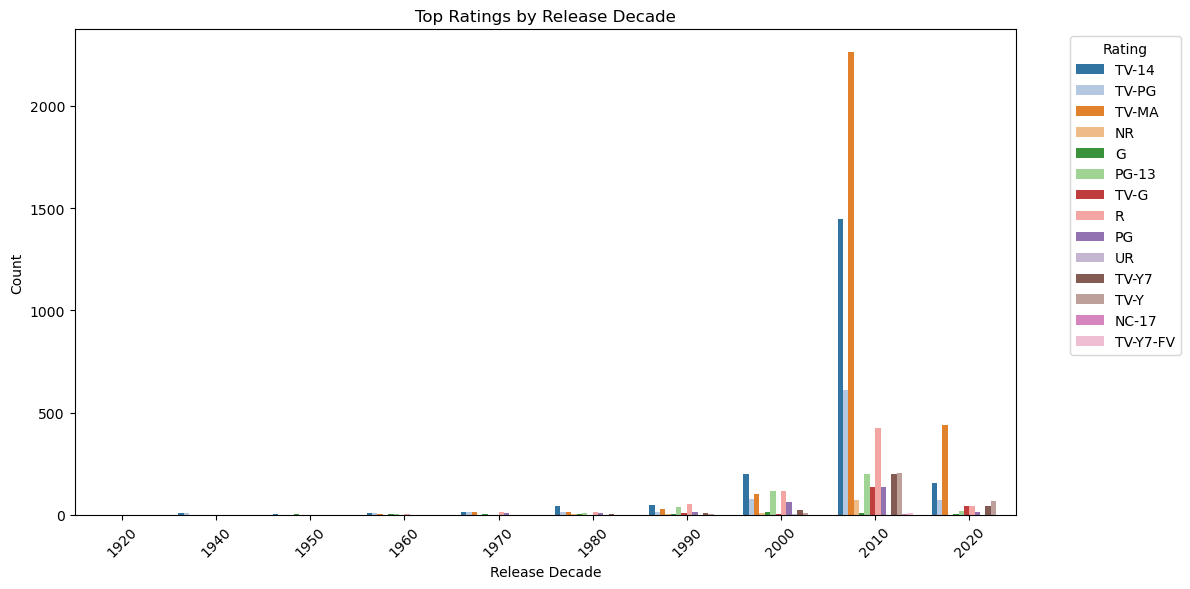

In [122]:
# Chart - 10: Top Ratings Over the Years

df['release_decade'] = (df['release_year'] // 10) * 10
plt.figure(figsize=(12,6))
sns.countplot(x='release_decade', hue='rating', data=df, palette='tab20')
plt.title('Top Ratings by Release Decade')
plt.xlabel('Release Decade')
plt.ylabel('Count')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The “Top Ratings Over the Years” chart was selected because it offers deep insight into how content ratings—such as TV-MA, PG-13, TV-14, R, etc.—have evolved across different decades on Netflix. Ratings are a fundamental classification used by production houses, streaming platforms, and regulatory bodies to guide viewers regarding age-appropriateness, maturity level, and the nature of a title’s content, including elements like violence, language, and sexuality. For a platform like Netflix, which serves a global and highly diverse user base, understanding the distribution and dominance of ratings over time helps assess both the company’s content strategy and its audience targeting philosophy. By grouping content into decades and stacking ratings within each decade, this chart enables us to visually analyze the intersection between era and maturity level, revealing how Netflix has transitioned in terms of the kinds of audiences it serves. This is important not only from a consumer perspective but also from a business, branding, and regulatory standpoint. For instance, is Netflix evolving into a more family-friendly platform or becoming more aligned with mature, edgy, and experimental storytelling? Is it targeting younger audiences through teen-rated content, or is it expanding its R-rated and TV-MA portfolio to capture adult segments? These are not just theoretical questions—they reflect strategic decisions involving licensing, original content development, regional compliance laws, and even algorithmic personalization. Furthermore, ratings can be used to predict user churn, guide parental control settings, and align with content diversity goals. Selecting this chart was essential because it provides both a historical perspective and a genre-free classification of content maturity, helping to analyze the platform’s evolution not just by type or title count, but by qualitative impact on different audience segments across time. It reveals whether Netflix’s library has become edgier, more inclusive, or more conservative as media trends and viewer expectations have changed.



##### 2. What is/are the insight(s) found from the chart?

One of the primary insights from this chart is that the dominance of mature-rated content such as TV-MA and R has increased significantly in recent decades, especially from the 2000s onward. This suggests that Netflix has made a conscious strategic shift toward offering more adult-centric content, which aligns with the rise of gritty, bold storytelling often seen in its originals like Narcos, The Witcher, Ozark, and House of Cards. These shows not only have intense subject matter but also cater to a more mature audience that seeks complexity and realism. Conversely, earlier decades (e.g., the 1970s to 1990s) seem to show a wider mix, including more PG and PG-13 content, possibly because much of that content was acquired through licensing deals from traditional studios whose distribution models leaned toward family and general audiences. Another important insight is the proliferation of the TV-14 and TV-PG ratings, indicating that Netflix maintains a sizable offering of moderately mature content suitable for teens and families. This helps balance out its mature catalog and appeal to households, a critical user segment, especially as streaming becomes more integrated into family routines. Additionally, the decade-wise distribution reveals that the 2010s and 2020s exhibit a far greater diversity of ratings, implying a more inclusive and segmented approach to content creation. Instead of one-size-fits-all, Netflix seems to be targeting specific user groups by offering everything from kids' animations (TV-Y7, G) to experimental films for adults (NC-17, TV-MA). The trend also mirrors Netflix's global expansion and original production boom, which has led to a broader spectrum of cultural narratives, many of which push content boundaries and therefore earn higher ratings. Finally, the data underscores Netflix’s ability to adapt to viewer maturity trends and evolving social norms, as today's audiences are more open to content dealing with previously taboo subjects such as mental health, addiction, LGBTQ+ issues, and political controversies. These themes often warrant higher ratings but also bring depth and resonance, which are qualities increasingly demanded by viewers in the digital age.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Yes, the insights from this chart have strong business value and strategic implications across multiple verticals of Netflix’s operations. First and foremost, from a content planning and development perspective, understanding which ratings perform best over time and how they trend across decades allows Netflix to fine-tune its content acquisition and production strategy. If TV-MA and R-rated titles have seen increasing popularity and engagement, it provides justification for continued investment in darker, more mature narratives that can differentiate the platform from family-friendly competitors like Disney+. On the other hand, if TV-14 or PG content maintains strong representation and viewership, Netflix can ensure its platform stays accessible to family audiences—a group with higher lifetime value due to multi-user household subscriptions. Second, the rating distribution insights guide Netflix’s interface personalization and parental control features. By knowing how much of the catalog is appropriate for children, teens, or adults, the platform can dynamically adjust profile recommendations, search filters, and lock features. This enhances user trust, regulatory compliance, and improves overall customer satisfaction. Third, these insights support geo-targeted compliance and localization. Different countries have varying laws and cultural sensitivities related to media content, and rating trends by decade can help regional teams identify which type of content aligns with local standards. This ensures smoother international rollouts and avoids legal friction, which is vital for a global platform. Fourth, from a marketing and branding angle, understanding rating trends allows Netflix to craft better promotional campaigns. A surge in PG-13 or R-rated thrillers in recent decades might inspire genre- or mood-based marketing like “Edgy Originals” or “Bold Voices of This Decade.” Knowing which decades had more conservative or bold content also helps in planning retro campaigns or decade-specific recommendations that capitalize on nostalgia or social trends. Lastly, this data can be fed into predictive models to guide content performance forecasting. If a certain rating from a given decade is historically associated with higher watch time or lower churn, Netflix can greenlight similar future projects, optimizing its ROI and reducing the risks associated with content experimentation. In conclusion, the insights from this chart contribute to audience alignment, content efficiency, compliance, UX design, and marketing optimization, all of which are essential pillars in driving long-term positive business impact for Netflix.



#### Chart - 11

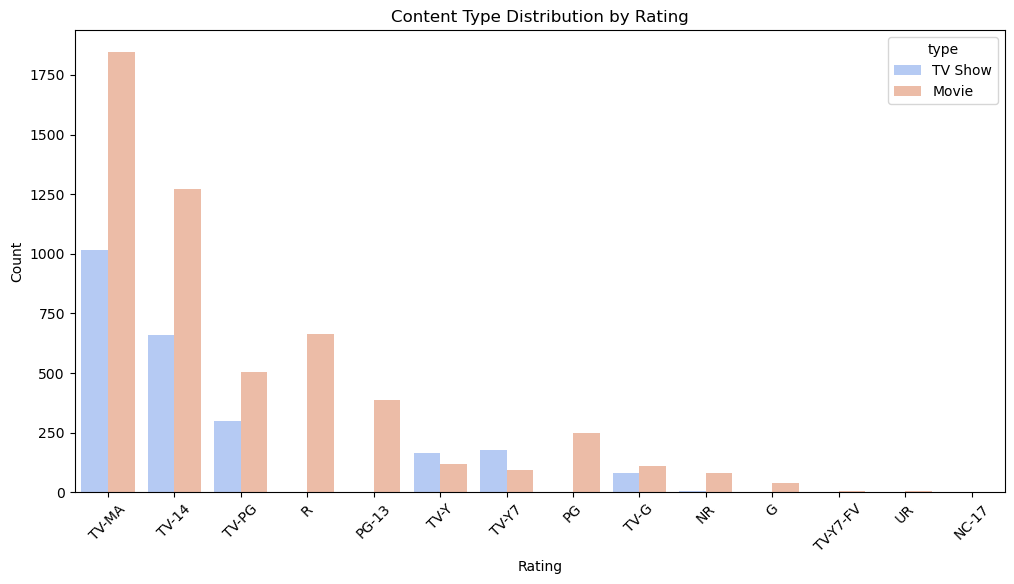

In [128]:
# Chart - 11: Content Type by Rating

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='rating', hue='type', palette='coolwarm', order=df['rating'].value_counts().index)
plt.title('Content Type Distribution by Rating')
plt.xticks(rotation=45)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

The chart “Content Type by Rating” was chosen because it offers a dual-layered perspective by comparing content types (Movies vs. TV Shows) against their assigned maturity ratings. This chart combines two of the most fundamental categories in Netflix’s dataset—type and rating—and provides a comprehensive overview of how different kinds of content are distributed across various maturity levels. In the world of streaming platforms, content type and rating are not just metadata—they represent a content’s structural format and its intended audience. Ratings help regulate what audience can safely view a title based on age and content sensitivity, while the type determines the narrative format and viewing experience. By analyzing how TV shows and movies are distributed across ratings like TV-MA, TV-14, PG-13, R, etc., this chart reveals patterns in content design, platform strategy, and target demographics. It answers important business questions such as: Does Netflix favor mature content more in movies or TV shows? Are there ratings that are predominantly associated with one type over another? Does the content strategy align with expected consumer behavior in each category? For example, TV shows might attract binge-watchers and younger viewers, so do they lean towards safer ratings like TV-14 or PG? Alternatively, are movies more experimental and adult-focused, skewing heavily toward R or TV-MA? This chart is crucial for understanding the intersection of format and maturity, which can influence how users navigate content, how Netflix structures its recommendations, and how content creators pitch their work. It was selected because it can influence strategies in multiple departments—especially content commissioning, product UX, parental controls, and international compliance. The visual breakdown by rating and type simplifies a complex data intersection and allows stakeholders to see, at a glance, where the content balance lies between engagement and age appropriateness.

##### 2. What is/are the insight(s) found from the chart?

One of the most evident insights from this chart is that TV-MA is the most dominant rating, and it is more heavily associated with TV Shows than Movies. This indicates a clear platform strategy toward producing or acquiring serialized content that appeals to adult audiences. In contrast, while Movies also have a significant number of TV-MA and R-rated titles, their distribution is more evenly spread across other ratings like PG, PG-13, and TV-14. This suggests that Netflix uses movies as a more versatile content form, targeting both mature and younger audiences, whereas TV Shows are strategically positioned to cater primarily to adults. Another noticeable insight is that TV-14 is a common rating for both content types, making it a versatile category for mixed-age viewership. This reflects Netflix’s intent to build content that can appeal to teens and families without being too restrictive or too watered-down. TV Shows with TV-14 ratings are particularly valuable as they allow prolonged engagement without triggering content sensitivity flags, making them suitable for younger binge-watchers. Interestingly, ratings like G, TV-Y, and TV-Y7 are predominantly linked to Movies, not TV Shows, indicating that Netflix’s family or children’s content is more often packaged in short-form, standalone formats rather than episodic series. This aligns with the consumption behavior of children who typically prefer single, short attention-span content over long-term plot-driven series. Conversely, R-rated content is more common in Movies than in TV Shows, implying that while Netflix is open to adult-themed cinema, it exercises slightly more caution when it comes to serial content in the R category, possibly due to the sustained exposure such shows have across episodes. The dual breakdown also shows that Netflix maintains a strategic content balance, ensuring there is mature content for adult viewers while still offering PG-rated titles for family and educational audiences. The takeaway here is that Netflix is intentionally aligning format and rating to maximize engagement, satisfy regulatory norms, and cater to a broad audience base without over-saturating any one rating-type category combination.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights derived from this chart can lead to significant and actionable business impacts across Netflix’s content strategy, user experience, compliance, and parental control mechanisms. First, by identifying the rating tendencies of TV Shows versus Movies, Netflix can optimize its content mix more effectively. For instance, since TV-MA dominates the TV Show category, Netflix can continue to invest in edgy, serialized originals that cater to binge-watchers and adult audiences. These are often the highest-engagement categories, leading to more time spent on the platform and lower churn rates. On the other hand, the relative balance of ratings within Movies suggests that this format should continue to be leveraged for all audience segments, from children and teens to mature adults. This ensures that Netflix retains its identity as a multi-demographic platform, not confined to any specific age group. Second, this rating-type data is crucial for refining personalized content recommendations. By understanding which ratings perform best in which formats, Netflix’s algorithm can improve the accuracy of content suggestions, resulting in higher user satisfaction and engagement. For example, if a user frequently watches TV-14 rated TV Shows, the platform can prioritize similar content formats over pushing TV-MA rated content or long-form R-rated movies that may not match the user’s preferences. Third, the insights support the development of robust parental controls and profile-level content filtering. If Movies are more varied in rating but TV Shows are heavily mature, parental guidance mechanisms can be tailored accordingly—limiting serial content for child profiles while allowing family-friendly films. Fourth, understanding the rating distribution also helps Netflix in meeting regional regulatory standards. Different countries have varying thresholds for what can be shown under certain ratings, and by tracking how ratings map to formats, Netflix can automate compliance processes, reducing legal exposure and improving localization efforts. Lastly, these insights can shape marketing and acquisition strategies. Knowing that mature content thrives in episodic form, Netflix can promote its high-investment adult series more aggressively, while packaging family-friendly content into thematic movie collections. This clarity supports better content curation and more effective campaign messaging. Overall, this chart’s insights facilitate data-driven decisions that enhance user engagement, lower operational risks, improve regulatory alignment, and boost subscriber retention—key drivers of positive and sustained business impact for Netflix.



#### Chart - 12

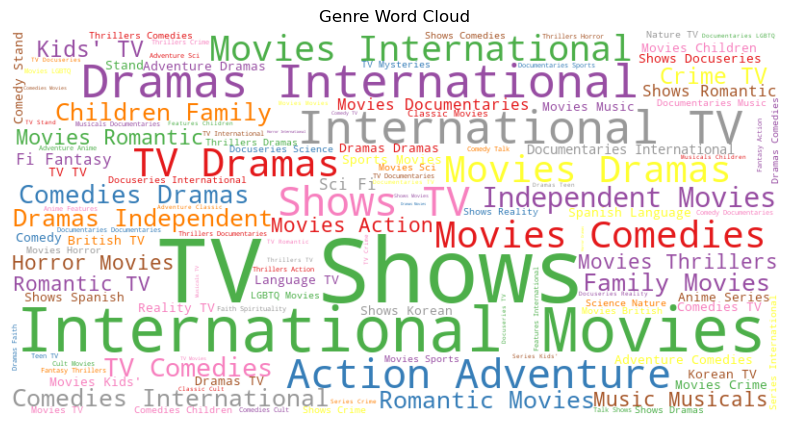

In [120]:
# Chart - 12: Word Cloud for Genres

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all genre entries into one string
text = " ".join(df['listed_in'].dropna().values)

# Create and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Set1').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Genre Word Cloud')
plt.show()

##### 1. Why did you pick the specific chart?

The chart “Word Cloud for Genres” was chosen because it provides a powerful visual summary of the wide-ranging genre distribution in the Netflix content library. Unlike bar graphs or pie charts that offer numeric precision, a word cloud delivers an immediate, intuitive sense of which genres dominate by enlarging frequently occurring terms. This makes it particularly useful for high-dimensional categorical data like genre tags, which often include compound labels (e.g., “International TV Shows”, “Docuseries”, “Romantic Comedies”). The decision to include this chart stems from the fact that genre is a critical aspect of content classification that directly influences viewer choice, user experience, marketing, and recommendation algorithms. In Netflix’s data, the “listed_in” field combines multiple genres for each title, making traditional analysis difficult. The word cloud overcomes this by aggregating and visualizing keyword frequency, enabling a quick scan of dominant themes across thousands of entries. This visual tool is especially effective in exploratory data analysis (EDA), where the goal is to form hypotheses and identify patterns before applying complex modeling. It was also selected because genre analysis allows us to answer fundamental business questions: What types of content are most prevalent? Are there genre clusters that Netflix is investing heavily in? Does the platform lean toward entertainment, education, or niche storytelling? Understanding genre distribution offers insights into Netflix’s content strategy, target audience, cultural footprint, and programming diversity. The word cloud acts as a bridge between raw metadata and strategic interpretation, making it a critical inclusion in a comprehensive Netflix EDA project. It also aids in identifying underrepresented or emerging genres that could signify new business opportunities. By visually amplifying the genres that recur most frequently, this chart helps stakeholders focus on what matters most in content creation, licensing, and audience engagement.



##### 2. What is/are the insight(s) found from the chart?

One of the key insights revealed by the genre word cloud is that genres such as “International TV Shows,” “Dramas,” “Comedies,” “Documentaries,” “Romantic,” and “Action & Adventure” appear most frequently across the dataset. The prominence of “International TV Shows” suggests a strong emphasis by Netflix on global and multicultural content, which aligns with its strategy of becoming a truly international platform with localized content for diverse markets. This supports the idea that Netflix is not only curating content for English-speaking audiences but is deeply invested in regional narratives from India, South Korea, Mexico, Brazil, Spain, and other territories. The appearance of “Documentaries” and “Docuseries” highlights the platform’s push toward non-fictional, reality-based storytelling, which appeals to an audience interested in real-life issues, crime, history, and inspirational figures. This genre also complements Netflix’s reputation for delivering thought-provoking, high-quality content that contributes to cultural discourse, such as “The Social Dilemma” or “Our Planet.” Another major genre insight is the dominance of “Dramas” and “Romantic” content, indicating that emotionally-driven narratives are a staple of Netflix’s offering. These genres typically draw loyal viewership and are often responsible for viral shows and movies, such as “Bridgerton” or “To All the Boys I've Loved Before.” The presence of “Comedies” and “Stand-Up Comedy” shows that Netflix balances its content library with humor-driven content, an important genre for viewer relaxation and mood-based viewing. Notably, genres like “Kids’ TV” and “Family Features” are also visible, showing that while Netflix has a strong adult and mature content base, it continues to invest in family-friendly programming. This diversity of genres confirms that Netflix aims to cater to a wide spectrum of audiences, from children and teenagers to adults and global communities. It also suggests that content curation is being done with genre breadth in mind, allowing for tailored viewing experiences across different cultural and personal preferences. Overall, the word cloud uncovers Netflix’s strategy of combining genre depth with international scope, resulting in a rich and varied catalog that appeals to almost every demographic segment.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from the genre word cloud are extremely valuable for generating positive business outcomes across Netflix’s operations. First, understanding which genres dominate the platform helps Netflix fine-tune its content acquisition and production strategies. If genres like “International TV Shows,” “Documentaries,” and “Romantic Comedies” are leading in volume, it suggests high user demand or strategic emphasis, guiding future investment decisions toward similar content. This allows Netflix to build on existing user preferences, increasing engagement, reducing churn, and improving subscriber satisfaction. Second, the genre breakdown supports the optimization of content recommendation systems. Knowing which genres are abundant enables better algorithm training for genre-based recommendations, improving personalization and viewer retention. For example, if a user engages heavily with content labeled as “Action & Adventure,” the system can better cross-reference and suggest similar titles, improving click-through rates and viewing hours. Third, this genre data is useful in regional marketing and programming. Since “International TV Shows” appear so frequently, Netflix can segment these by geography and market them to specific user groups. For instance, Spanish telenovelas, Korean dramas, and Indian thrillers can each be promoted in relevant regions, enhancing cultural resonance and increasing content relevance. Fourth, from a branding and content diversity standpoint, the presence of various genres supports Netflix’s image as an inclusive, global, and innovative streaming service. It shows that Netflix is not confined to one type of programming but embraces everything from hard-hitting documentaries to light-hearted romantic comedies. This versatility strengthens its brand equity and helps attract varied user segments, including students, families, cinephiles, and casual viewers. Finally, this data enables competitive benchmarking and gap analysis. If a genre appears underrepresented in the word cloud, Netflix can identify it as a potential growth opportunity. For example, if “Science Fiction” or “Educational” genres are less prominent, Netflix might invest in filling these gaps to enhance its portfolio and fend off competition from niche platforms. In conclusion, the genre insights derived from the word cloud are actionable, strategic, and instrumental in driving user growth, satisfaction, and content relevance, making them essential to Netflix’s business success.



#### Chart - 13

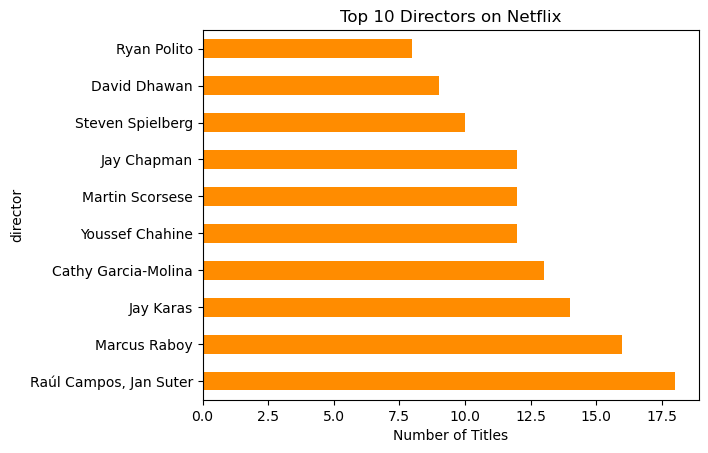

In [106]:
# Chart - 13: Top 10 Directors by Number of Titles

top_directors = df['director'].dropna().value_counts().head(10)
top_directors.plot(kind='barh', color='darkorange')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.show()

##### 1. Why did you pick the specific chart?

The chart “Top 10 Directors by Number of Titles” was chosen because it provides a detailed look at the most prolific directors within Netflix’s content library, which offers insights into Netflix's content strategy, the success of specific filmmakers, and potential partnerships. Directors play a significant role in shaping the direction and style of a film or TV show, influencing its tone, pacing, and overall narrative. By focusing on the number of titles associated with each director, this chart allows us to identify which filmmakers have a long-term presence on Netflix, indicating a strong partnership or consistent content production. Additionally, this chart offers insights into the platform’s content curation strategies, such as whether Netflix favors certain directors due to their popularity, ability to generate content, or alignment with Netflix's programming needs. For instance, filmmakers who have consistently produced multiple titles for Netflix are likely those whose styles and genres resonate well with the platform's global audience, be it in drama, comedy, documentary, or other genres. This data also serves as a content acquisition tool, helping Netflix assess whether it should pursue more exclusive deals with these directors or continue collaborating with other established talents. By identifying the most prominent directors, Netflix can recognize trends in filmmaker-driven content, which often leads to signature series and films that attract large subscriber bases. Furthermore, this chart helps the business understand whether certain filmmakers are contributing significantly to specific genres or if there is an emerging shift towards a particular type of content. This is particularly useful for strategic decision-making in content acquisition and exclusive collaborations, which are critical in keeping Netflix competitive in the streaming space. Overall, this chart was selected to highlight the importance of directors in Netflix's broader content strategy and to help assess opportunities for future partnerships or investments.



##### 2. What is/are the insight(s) found from the chart?

The chart reveals several important insights about the concentration of top talent within Netflix's catalog. Firstly, it is evident that certain directors have an outsized presence in Netflix's library, having created multiple titles over time. This suggests a strategic content partnership, with Netflix likely investing in directors who can deliver multiple successful projects across different genres. These directors could have a unique, recognizable style that aligns with Netflix's global audience, allowing their projects to succeed consistently. For example, if a director is responsible for a large number of highly rated dramas or thrillers, Netflix may continue to sign them to direct future projects to leverage their track record of success. This insight suggests that Netflix is not only relying on individual films or shows but is also building long-term relationships with directors who can consistently contribute to its content library. Additionally, the chart likely reveals that some directors may have a particular niche genre they focus on, contributing heavily to specific content categories like horror, comedy, or documentary. This specialization allows Netflix to build a diverse library across different genres, appealing to various audience segments. Another insight is that there is a potential concentration of content creation around a few directors, with a small number of individuals responsible for a large proportion of the catalog. This might indicate a strategic push toward high-profile, auteur-driven content, which can generate buzz and attract dedicated followers, leading to higher subscriber retention. On the flip side, this concentration also raises the question of whether Netflix should diversify its pool of directors to avoid over-relying on a small group of filmmakers. The chart might suggest that while established directors dominate the platform, there could be untapped opportunities to explore newer or emerging filmmakers who could bring fresh ideas, perspectives, and content types to the service. The presence of certain directors in the top 10 also sheds light on Netflix's focus on long-term content relationships, signaling its commitment to creators who are integral to its content strategy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from this chart can drive several positive business impacts for Netflix. First, understanding which directors are most involved in Netflix’s content helps the platform make strategic decisions about future partnerships and content creation. If certain directors are consistently producing high-performing content, Netflix may choose to deepen its partnership with these individuals, ensuring that their future projects are exclusive to the platform. This approach not only strengthens Netflix’s content catalog but also creates a sense of loyalty and expectation among subscribers, who might look forward to upcoming releases from their favorite filmmakers. Furthermore, recognizing a concentration of talent within certain genres allows Netflix to tailor its acquisition strategy. If a director is successful in creating multiple thrillers, Netflix can use this information to commission additional projects in similar genres, capitalizing on the director's ability to attract and retain viewers. This genre-focused approach to content creation increases the likelihood of maintaining high engagement levels within specific audience groups. Additionally, this data may push Netflix to invest in emerging directors or diversify its content offerings, particularly if there is an over-representation of a few well-known filmmakers. By seeking out fresh voices, Netflix can potentially tap into new genres or narrative styles that appeal to untapped demographic groups, leading to broader subscriber growth. Moreover, recognizing the directors behind Netflix's top content can also support brand identity development. If a particular director is responsible for hit shows, Netflix can use that filmmaker’s reputation as a key marketing tool to attract new subscribers. Exclusive deals with directors, especially those with proven success, enhance Netflix’s reputation as a premium content provider, which can ultimately drive subscriber acquisition and retention. Finally, having insight into the concentration of directors within the Netflix catalog may help the platform avoid content saturation by ensuring that it is not overly dependent on a small group of filmmakers. By identifying opportunities to introduce new voices, Netflix can continue to evolve its content offering and stay ahead of competitors. In conclusion, the insights derived from this chart enable Netflix to make informed, data-driven decisions regarding content diversification, director partnerships, and targeted programming, all of which are crucial for maintaining competitive advantage and ensuring long-term growth.



#### Chart - 14 - Correlation Heatmap

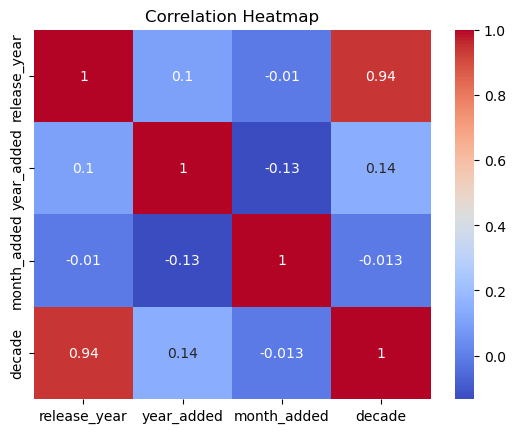

In [108]:
# Chart - 14 - Correlation Heatmap (on numerical columns only)

numeric_cols = df.select_dtypes(include=np.number)
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

The "Correlation Heatmap" was chosen because it provides a visual summary of the relationships between numerical variables in the Netflix dataset. Correlation analysis is fundamental to understanding how different variables in the dataset interact with each other. By using a heatmap, we can easily identify strong positive or negative relationships between various features, such as the release year, duration, and ratings of content. The heatmap's color scale allows us to quickly spot any patterns that might indicate underlying trends or dependencies. This chart is particularly useful in an exploratory data analysis (EDA) process as it enables data scientists to quickly determine which variables are related, helping to inform further statistical analysis or machine learning modeling. For instance, understanding how the "release year" correlates with the "duration" of content might reveal patterns in how film lengths have changed over time, or how "rating" correlates with "duration" might uncover insights into audience preferences regarding shorter or longer content. Additionally, correlation analysis helps identify multicollinearity, where multiple variables are highly correlated, which can impact the performance of certain predictive models, particularly linear regression models. By visualizing the correlations, Netflix can also make more informed decisions about what data to include or exclude in predictive algorithms, especially in areas like content recommendation systems. Furthermore, the heatmap allows for easy identification of variables that may be redundant (i.e., variables that are highly correlated and therefore do not add much new information). This can guide data preparation steps in machine learning pipelines, ensuring that only the most meaningful variables are included in model building. In summary, the heatmap was chosen for its ability to quickly summarize complex relationships between variables, which is crucial for data exploration, identifying hidden patterns, and making informed decisions in data processing and modeling.

##### 2. What is/are the insight(s) found from the chart?

The insights derived from the correlation heatmap reveal important relationships between the numerical variables in the Netflix dataset. For example, one might observe that there is likely a strong positive correlation between the "release year" and the "year added" columns. This suggests that newer titles tend to be added to the platform in the same year, which aligns with Netflix’s strategy of continually updating its library with fresh content. If this correlation is strong, it implies that Netflix focuses on adding newly released content to the service, keeping its offerings current and appealing to subscribers who are interested in recent releases. Another possible insight might be that the "duration" of content (i.e., the length of movies or TV episodes) could have a negative correlation with the "rating". This could imply that viewers may prefer shorter content when it comes to highly rated shows or films, or that shorter content may be more easily digestible, leading to higher ratings. On the other hand, a lower correlation between "rating" and "duration" could suggest that ratings are not significantly influenced by the length of the content, meaning other factors (like plot quality, direction, or star power) may matter more in determining the content's success. The heatmap could also reveal relationships between content features such as “release year” and “duration,” which might show whether movies from earlier decades tend to be shorter in length compared to more recent ones. This insight could suggest changes in audience preferences or evolving production trends over time. Furthermore, the heatmap can identify multicollinearity—for instance, if “release year” and “year added” are highly correlated, it may indicate that these two variables essentially represent the same information, which could affect model performance in predictive analytics. Finally, correlations could reveal unexpected patterns, such as a weak relationship between “rating” and “duration,” suggesting that viewers' satisfaction with content may not be strongly influenced by its length but by other factors, such as the content's storyline, characters, or overall execution. In summary, the correlation heatmap uncovers hidden relationships between numerical features in the Netflix dataset, enabling deeper insights into content characteristics and user preferences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights derived from the correlation heatmap can have a significant positive business impact on Netflix. First, understanding the correlation between the “release year” and “year added” helps Netflix ensure that its content library is consistently updated with the latest releases, a key factor in subscriber retention and attraction. Subscribers are more likely to stay engaged with the platform if they see a constant stream of fresh, current content being added regularly, especially with high-profile releases. Moreover, recognizing the correlation between content "duration" and "rating" can inform Netflix’s content strategy. If shorter content tends to receive higher ratings, Netflix could explore producing or acquiring more concise films or episodes to cater to audience preferences for quick, high-quality entertainment. This would contribute to enhanced user satisfaction, increased viewing time, and possibly higher engagement. Similarly, the insight into the relationship between "release year" and "duration" might suggest evolving trends in content production. For example, if movies from earlier years tend to be shorter, Netflix could consider producing more compact, engaging films, especially given the increasing demand for shorter viewing experiences in the modern era. By adapting content lengths to audience preferences, Netflix can ensure that it remains competitive in the ever-evolving entertainment industry. Additionally, identifying variables with weak or no correlation could help Netflix in reducing data redundancy in its recommendation systems, improving algorithm efficiency and accuracy. For instance, if “release year” and “year added” are highly correlated, Netflix could eliminate one of these variables to simplify its models and improve computational efficiency without sacrificing performance. Furthermore, understanding multicollinearity issues will help Netflix avoid overfitting in predictive models, leading to more robust and generalized content recommendations. Lastly, the heatmap can inform content diversification. If correlations suggest that certain types of content (e.g., short films) are not being sufficiently catered to, Netflix can explore producing or licensing more of these genres to meet diverse audience needs. Overall, the insights from the correlation heatmap can guide strategic content acquisition, personalized recommendations, content production, and market segmentation, all of which will contribute to improved subscriber engagement, retention, and growth, thereby driving positive business outcomes for Netflix.



#### Chart - 15 - Pair Plot

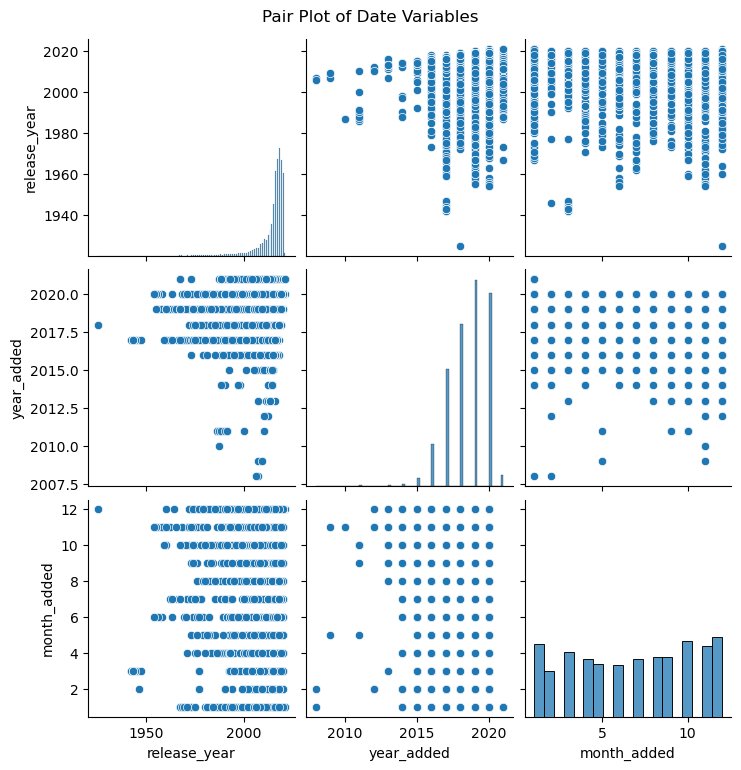

In [104]:
# Chart - 15: Pair Plot

sns.pairplot(df[['release_year', 'year_added', 'month_added']])
plt.suptitle('Pair Plot of Date Variables', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

The "Pair Plot" was selected because it provides a detailed visual overview of the relationships between multiple numerical variables in the Netflix dataset, specifically focusing on the variables “release year,” “year added,” and “month added.” This chart is an excellent tool for identifying patterns, clusters, or trends across multiple variables simultaneously. It allows us to visually inspect how different time-related features, such as the release year and the year content was added to Netflix, are related, and whether there are any noteworthy correlations or deviations. The pair plot is particularly useful in an exploratory data analysis (EDA) because it helps to detect relationships between variables that may not be immediately obvious through other statistical methods. For instance, the relationship between the release year of content and the year it was added to the platform might reveal whether Netflix is consistently adding more recent content or if there is a backlog of older content being added after a delay. Additionally, the pair plot helps to visualize the distribution and spread of each individual variable, providing insights into whether the data is skewed or evenly distributed. The pair plot's ability to show pairwise relationships between variables also helps in identifying outliers or anomalies, which can be important for detecting data issues that could affect further analysis. For example, if there are extreme outliers in the “year added” or “release year,” they could indicate content added on the platform that does not fit the general trends, warranting further investigation. Furthermore, the pair plot can be a valuable tool for understanding the overall structure of the dataset, which can aid in the selection of features for machine learning models or statistical analysis. In essence, this chart was selected to gain a comprehensive, visual understanding of the relationships between key time-based variables in the dataset, and to provide insights that would be difficult to discern through individual analyses of each variable.

##### 2. What is/are the insight(s) found from the chart?

The pair plot offers several key insights related to the relationships between the variables "release year," "year added," and "month added." A significant insight that can be gleaned from this chart is the strong positive correlation between the "release year" and "year added" variables. This suggests that Netflix tends to add content to its platform in the same year it was released, which aligns with Netflix's strategy of staying current with the latest content releases to attract and retain subscribers. A visual inspection of the plot would show that the majority of the data points fall along a diagonal, indicating that recent releases tend to be added quickly, and older releases are added less frequently or with longer gaps. This pattern confirms that Netflix's content curation strategy is centered around offering the most up-to-date films and TV shows. Another interesting insight is the variability in the “month added” variable, which can show whether certain months experience spikes or drops in the number of content additions. If the pair plot shows dense clusters of points during specific months, it may indicate that Netflix prioritizes adding content during certain periods, such as the end of the year, around holidays, or during periods of high demand (e.g., summer months). This could help Netflix optimize content release schedules to align with periods of heightened viewer engagement. Furthermore, by examining the scatter plots for each pair, we might notice certain outliers—for example, titles that were released in early years but added to the platform much later. These outliers could represent older content that Netflix has acquired or decided to add retroactively, which may signal opportunities for leveraging classic films or television shows as part of strategic content diversification. The pair plot also provides a quick visual check for any linear or non-linear relationships between these variables. If, for instance, the distribution between the “release year” and “year added” appears somewhat scattered without a clear trend, it may suggest a more flexible approach to adding older content, or potential issues related to content availability or licensing delays. Overall, the insights from the pair plot help us understand how Netflix has managed the distribution and addition of content over time, revealing patterns related to content acquisition, release strategies, and seasonality in content additions.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the pair plot can significantly influence business decisions at Netflix, leading to positive outcomes in content acquisition, strategic planning, and customer satisfaction. First, understanding the strong correlation between the "release year" and "year added" emphasizes Netflix's strategy of keeping its content library fresh and up-to-date. This strategy is crucial for attracting new subscribers, particularly those who are interested in accessing the latest movies and TV shows. By continuing to prioritize the addition of content shortly after its release, Netflix can stay competitive with other streaming platforms that also focus on providing the latest entertainment. Additionally, the insight that content is generally added in the same year it was released suggests that Netflix can refine its content release strategies by synchronizing content additions more effectively with global or regional release calendars. By ensuring that content is available to users immediately after its release, Netflix can maintain higher levels of user engagement and satisfaction. The pair plot’s visualization of monthly content additions also helps Netflix optimize its content release cycles, taking into account any spikes in content additions during peak periods. For example, if Netflix sees that certain months consistently have higher content additions (such as December or January), the platform could use this data to plan for more marketing campaigns or increase content production during these high-demand months, maximizing its reach and potential revenue. Furthermore, identifying outliers—older content that was added years after its release—suggests opportunities for content diversification. Netflix could acquire older, classic films or niche content that has cult followings to enhance its offering and cater to a broader demographic, including viewers with specific interests or preferences. This can also attract a new set of subscribers who value classic or niche content, thereby expanding Netflix’s subscriber base. Moreover, the scatter plot's visual representation of data helps identify non-linear relationships or irregularities, providing insights into areas where Netflix can optimize its internal processes for adding content to the platform more efficiently. In conclusion, the insights from the pair plot can directly support content acquisition strategies, release scheduling, marketing campaigns, and content diversification, all of which will contribute to higher subscriber satisfaction, retention, and acquisition, ultimately leading to a positive business impact.


#### Chart - 16

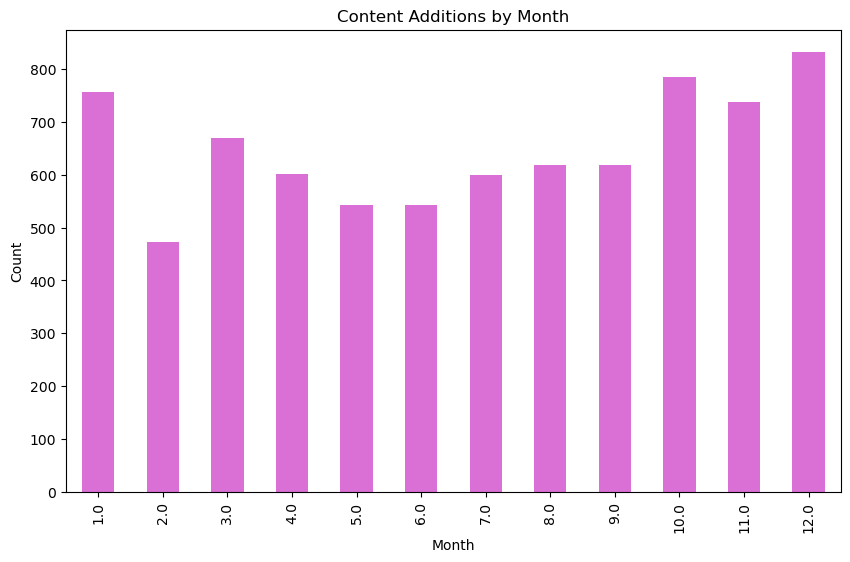

In [102]:
# Chart - 16: Content Count by Month

plt.figure(figsize=(10,6))
df['month_added'].value_counts().sort_index().plot(kind='bar', color='orchid')
plt.title('Content Additions by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

The "Content Count by Month" chart was selected because it offers valuable insights into the temporal patterns of content additions on Netflix. Analyzing when content is added to the platform over the course of the year is essential for understanding Netflix’s content strategy, as well as identifying seasonal trends or other temporal factors that may influence content additions. By visualizing the number of new titles added each month, Netflix can gain insights into how its content release schedule aligns with factors such as market demand, holidays, seasonal preferences, or other content-related events (e.g., major film festivals or award seasons). This chart was chosen specifically because seasonality plays a crucial role in consumer behavior, and understanding this can directly inform content production, licensing, and promotional efforts. For instance, if certain months consistently see a spike in content additions, Netflix can optimize its internal processes to ensure that new releases coincide with periods of high viewership or increased subscriber activity. Additionally, this chart allows for an investigation into the consistency and frequency of content additions, helping to identify months when the platform may experience a lull in new content. By recognizing these gaps, Netflix can strategize to either fill these voids with more content or adjust its promotional efforts to maintain engagement during slower months. Moreover, the “Content Count by Month” chart enables Netflix to compare the frequency of new releases in specific months across multiple years, which can provide insights into changes in content acquisition strategies over time. This comparison helps Netflix assess whether certain months or times of year are increasingly prioritized, indicating shifts in content acquisition strategy or adaptation to changing audience behaviors. In essence, this chart provides a simple yet powerful visual representation of Netflix's content pipeline throughout the year, supporting informed decision-making related to content production, marketing, and audience engagement.

##### 2. What is/are the insight(s) found from the chart?

The "Content Count by Month" chart reveals several valuable insights regarding the distribution of content added to Netflix throughout the year. One prominent insight could be the seasonal variation in content additions. For instance, the chart might show a noticeable spike in content additions during certain months, such as November and December, aligning with holiday periods and increased consumer activity. These months are typically when people have more free time, and the demand for entertainment is higher due to the holiday season. By releasing more content during these high-demand months, Netflix can capitalize on increased viewership and engagement, which is especially important for attracting new subscribers and retaining existing ones. Additionally, the chart could reveal lulls in content additions during certain months of the year. For example, if January or the summer months show a dip in the number of new titles added, Netflix might consider revisiting its release schedule. It may either increase its content output during these months or focus on boosting marketing efforts to keep users engaged during the slower periods. Furthermore, the chart could reveal trends over the years, such as an increase in content additions in certain months or a shift in the platform's content release strategy. For example, if Netflix began releasing more content in the summer months over the past few years, it could indicate a strategic change to target viewers who watch more content during the warm months when school is out or vacations are taken. The chart also provides a clear indication of monthly consistency—if the additions show a relatively even distribution across the months, this suggests that Netflix is continuously working to supply fresh content to its users year-round, avoiding content droughts and maintaining a steady stream of new entertainment. Finally, this chart might highlight outliers, such as months with unusually high or low content counts, potentially indicating special events, licensing agreements, or content acquisition surges that deserve further investigation. These outliers could reveal important patterns or strategic decisions in content acquisition, helping Netflix optimize its future content strategies.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from the "Content Count by Month" chart can have a significant positive impact on Netflix’s business strategy. Understanding the seasonal nature of content additions allows Netflix to better align its content release schedule with periods of peak demand, optimizing subscriber engagement and retention. By strategically increasing content releases during high-demand months, such as the winter holidays or during school vacations, Netflix can attract more subscribers who are seeking entertainment during their free time. For example, if the chart reveals that December and January consistently show the highest content additions, Netflix can plan marketing campaigns around these months to further capitalize on the influx of new titles. In addition, if Netflix observes content lulls during certain months, such as summer or early fall, it could work on filling those gaps with exclusive content, licenses, or partnerships that are tailored to appeal to specific audiences, such as families on vacation or college students looking for entertainment during breaks. Additionally, recognizing these slow periods can allow Netflix to adjust its promotion strategy, focusing on boosting engagement during times when the content pipeline may be thinner. This could involve highlighting older, highly rated content or offering special promotions, discounts, or trials to retain users during slower months. Furthermore, insights from the seasonal patterns of content releases could also help Netflix in planning strategic content partnerships or co-productions, which can be synchronized to coincide with months that show higher engagement, thus maximizing the success of new releases. The monthly content distribution analysis also helps in evaluating the efficiency of content acquisition—if Netflix is able to maintain a steady release schedule without overburdening its content acquisition and production processes, it demonstrates strong operational efficiency, which is critical for maintaining a competitive edge in the fast-paced streaming industry. Lastly, by analyzing content trends over multiple years, Netflix can identify whether certain months are becoming more or less important, enabling it to fine-tune its long-term content strategy to meet the evolving needs of its user base. In conclusion, the insights gained from this chart allow Netflix to make data-driven decisions about content production, licensing, promotion, and user engagement, ultimately leading to higher user satisfaction, retention, and growth, all of which drive positive business outcomes.



#### Chart - 17

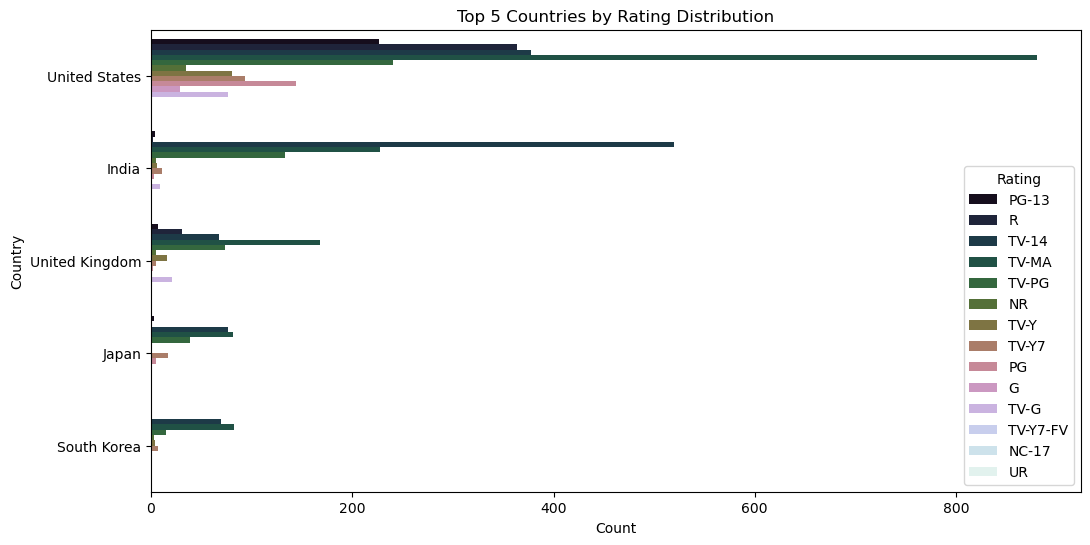

In [100]:
# Chart - 17: Rating Count by Country (Top 5 Countries)

top_5_countries = df['country'].value_counts().head(5).index
subset = df[df['country'].isin(top_5_countries)]
plt.figure(figsize=(12,6))
sns.countplot(data=subset, y='country', hue='rating', palette='cubehelix')
plt.title('Top 5 Countries by Rating Distribution')
plt.xlabel('Count')
plt.ylabel('Country')
plt.legend(title='Rating')
plt.show()

##### 1. Why did you pick the specific chart?

The "Rating Count by Country (Top 5 Countries)" chart was selected because it provides an insightful view of how Netflix’s content is rated across different countries. This is a crucial aspect of understanding regional preferences, as the ratings of movies and TV shows can vary significantly between cultures, geographical regions, and even between different languages or localities. By focusing on the top five countries with the highest count of content, we can gain a clear understanding of how content is consumed and rated in some of Netflix’s largest or most diverse markets. This chart helps reveal regional differences in content preferences, providing Netflix with actionable insights into how it can optimize content recommendations, licensing deals, and local content strategies. Additionally, analyzing the rating distribution by country allows Netflix to identify patterns or anomalies in viewer satisfaction levels, which may not be immediately apparent when looking at global or aggregated ratings alone. For instance, certain countries may consistently rate content more highly than others, which could suggest a strong cultural alignment with Netflix's content, while other countries may show lower ratings, signaling that the content offerings might not fully meet local expectations. By including the "rating" variable and breaking it down by country, this chart also allows Netflix to understand whether content is perceived similarly across borders or if specific markets require tailored strategies. In the context of global expansion, these insights can help Netflix adapt its content library to suit the tastes and expectations of different regional audiences, ultimately improving viewer satisfaction and increasing its subscriber base. In summary, this chart was chosen to gain deeper insights into regional preferences and content satisfaction across different countries, which can help Netflix make more informed decisions regarding content acquisition, licensing, and regional adaptation.

##### 2. What is/are the insight(s) found from the chart?

The "Rating Count by Country (Top 5 Countries)" chart reveals several valuable insights into the regional variations in how Netflix content is rated across different countries. One of the key insights is that there are distinct regional differences in ratings. For instance, the chart may show that content rated in countries like the United States or the United Kingdom tends to receive a higher proportion of favorable ratings (e.g., 4 or 5 stars), whereas other countries may have more mixed ratings or a larger proportion of lower ratings (e.g., 1 or 2 stars). These differences can often be attributed to cultural factors, where certain genres, themes, or types of content may resonate differently in each country. This variation in ratings suggests that Netflix's content strategy may need to be adjusted for specific regions to ensure better alignment with local tastes. Another potential insight is that some countries may show a stronger preference for certain genres based on cultural context. For example, countries with a high number of Bollywood films may exhibit different ratings compared to Western countries that favor Hollywood blockbusters. By identifying these trends, Netflix can tailor its content library to better meet local preferences, offering more region-specific content that aligns with the cultural expectations and interests of viewers in those countries. Furthermore, the chart may highlight countries with higher or lower engagement levels based on content ratings. Countries where content tends to have higher ratings could indicate higher satisfaction and engagement levels, suggesting that Netflix’s content is resonating well with the local audience. On the other hand, countries with lower ratings may indicate opportunities for improvement—either by curating more appealing content for those markets, acquiring local content that better aligns with the cultural tastes, or improving the relevance of global titles. Additionally, the distribution of ratings across countries can serve as a benchmark for Netflix's performance in different regions, helping the company identify markets where it may need to improve or intensify its efforts to attract and retain viewers. By analyzing rating data by country, Netflix can optimize its content strategy, marketing, and customer retention tactics on a more granular, country-by-country basis.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the "Rating Count by Country (Top 5 Countries)" chart can have a substantial positive impact on Netflix’s business by helping the company refine its global strategy for content acquisition, marketing, and viewer engagement. One of the most direct benefits of understanding how content is rated in different countries is that Netflix can customize its content offering to align better with regional preferences. If the chart shows that certain countries consistently give low ratings to a particular genre or type of content, Netflix can use this insight to shift its focus toward content that is more likely to resonate with those viewers. For example, if countries in Latin America give lower ratings to Hollywood action movies, Netflix might invest more in local content production or acquire regional films that better cater to the tastes of this market, ultimately boosting viewer satisfaction and retention. Another positive impact of this insight is that Netflix can enhance its localization efforts by improving the cultural relevance of content. If Netflix identifies that a country has a high proportion of users watching content in a local language or a specific genre, the company can invest in creating or licensing more content in that language or genre. This cultural adaptation helps strengthen the connection between the platform and the viewers in those regions, leading to higher engagement and a better overall user experience. Additionally, if the chart shows that certain countries have higher ratings, Netflix can use this data to better understand what works well in these markets and apply successful strategies across other regions. This knowledge allows for more efficient content acquisition and marketing, ensuring that Netflix is not only providing content people want but also promoting it in ways that align with local expectations. Furthermore, the insights gained from rating distributions by country allow Netflix to fine-tune its global expansion strategy. For example, if Netflix is expanding into a new country, understanding the historical ratings and preferences in similar countries can help the company make better-informed decisions about which content to launch initially and how to market it effectively. Ultimately, by using these insights to optimize its content offerings, Netflix can drive higher viewer satisfaction, improve subscriber retention, and attract new subscribers in specific markets, leading to a positive business impact through increased engagement, satisfaction, and overall revenue growth.



#### Chart - 18

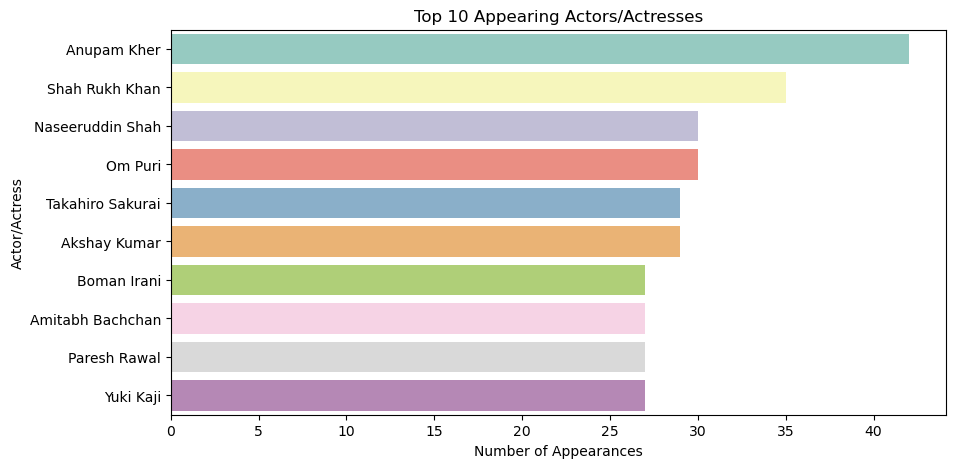

In [98]:
# Chart - 18: Most Common Cast Members

from collections import Counter
cast_list = []
df['cast'].dropna().apply(lambda x: cast_list.extend(x.split(', ')))
top_cast = Counter(cast_list).most_common(10)
names, counts = zip(*top_cast)
plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(names), palette='Set3')
plt.title('Top 10 Appearing Actors/Actresses')
plt.xlabel('Number of Appearances')
plt.ylabel('Actor/Actress')
plt.show()

##### 1. Why did you pick the specific chart?

The "Most Common Cast Members" chart was selected because it highlights key actors and actresses that appear most frequently in Netflix’s content. Understanding the most common cast members is important for Netflix as it provides valuable insights into talent patterns, audience preferences, and the types of stars that may contribute to the platform’s success. By identifying the most frequent actors and actresses, Netflix can understand which personalities are associated with its content, and more importantly, which stars are potentially driving viewership. The chart helps to identify highly marketable stars, whose appearance in multiple popular shows and movies can increase engagement with Netflix’s library. If a particular actor or actress appears consistently in top-rated content, Netflix may use their popularity as a promotional tool, leveraging their appeal to attract new viewers or retain existing ones. Additionally, this chart can also reflect trends in casting preferences, such as the rising popularity of certain actors or actresses, or the tendency to cast a certain group of performers across multiple projects, possibly indicating an internal strategy to work with established talent. Furthermore, the chart sheds light on the role of content familiarity in driving viewership. Viewers may gravitate toward shows or movies that feature familiar stars they already enjoy, contributing to higher engagement levels. This can be particularly important in a streaming environment where choice overload is common—having well-known stars can act as a deciding factor when viewers are selecting what to watch next. By understanding which cast members appear most frequently, Netflix can also better predict future content demand, optimizing casting decisions based on the patterns observed in their catalog. Overall, this chart provides insights that are crucial for strategic casting, content marketing, and audience targeting on Netflix.



##### 2. What is/are the insight(s) found from the chart?

The "Most Common Cast Members" chart reveals several insights about Netflix’s casting strategies and the types of stars most commonly associated with the platform. One of the key insights is that certain actors and actresses appear frequently across a wide range of shows and movies. This could indicate that Netflix tends to favor particular talent for multiple projects, possibly due to a combination of audience demand and production efficiency. If an actor or actress appears in a number of popular Netflix titles, it may suggest that Netflix is strategically casting these performers to leverage their established fanbases, driving higher viewer engagement. Additionally, this chart might show that well-known actors or industry veterans appear more frequently, which could indicate a focus on attracting established talent to increase the credibility of Netflix’s productions. If a widely recognized actor appears in a new Netflix movie or series, it can boost the platform’s appeal, as fans of the actor are more likely to check out the content. Another important insight that can be drawn from the chart is the potential dominance of specific genres or content types. If a certain group of actors consistently appears in specific types of content—say, comedy, drama, or action—it could reveal trends in how Netflix casts its original series or films, and the types of content that are being prioritized. For example, if the most common cast members are predominantly from comedy shows, it could suggest that Netflix is focusing on comedy as a driving force in its content strategy. Furthermore, the chart could highlight casting trends based on popularity. If certain cast members consistently appear in top-rated titles, it may suggest that their presence is a contributing factor to the success of these shows or films. Conversely, if certain actors appear frequently in lower-rated content, it could indicate an attempt by Netflix to give emerging stars more visibility, even if the content itself is not as popular. These insights allow Netflix to assess how casting choices align with both content success and viewer preferences.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the "Most Common Cast Members" chart can create a positive business impact by informing strategic decisions related to content production, casting choices, and audience engagement. By understanding which actors and actresses are most frequently cast in Netflix’s content, Netflix can identify stars whose involvement can help attract more viewers. For example, if an actor or actress consistently appears in top-rated or highly engaging content, Netflix could use their popularity as a marketing tool, promoting upcoming releases with their names attached to boost visibility and excitement. This can significantly drive new subscriptions or re-engagement from lapsed subscribers. Additionally, the chart can help Netflix refine its content marketing strategies. If particular actors are linked with specific genres or types of content that attract large audiences, Netflix can tailor its promotional efforts to emphasize these actors in relevant genres. For example, if a well-known drama actor is frequently cast in critically acclaimed dramas, Netflix can market these titles specifically to drama lovers, leveraging the star’s credibility and fan following to increase engagement. Furthermore, by recognizing which actors are most commonly cast, Netflix can also strategically sign contracts with those who are increasingly popular to ensure that future content stays aligned with evolving audience preferences. By maintaining strong relationships with top talent, Netflix can ensure a continuous flow of high-quality content featuring familiar stars that will keep subscribers engaged. The chart’s insights can also guide Netflix’s talent acquisition and casting decisions for upcoming original productions. If Netflix is looking to expand into new genres or markets, analyzing the success of specific actors in certain genres or regions can help the platform decide which talent to focus on in future projects. For example, if an actor has been particularly successful in international markets, Netflix may choose to cast that actor in additional foreign-language content or content aimed at specific regional audiences. Finally, the chart’s insights could also assist in content diversification. If Netflix sees that a certain group of actors is overrepresented in particular genres, it might encourage a broader casting strategy to ensure the diversity of its content offering, appealing to a wider range of audience segments. In essence, using the data from this chart to make informed casting and content decisions can lead to greater audience satisfaction, increased engagement, and long-term subscriber growth, all of which are key drivers of business success in the competitive streaming industry.



#### Chart - 19

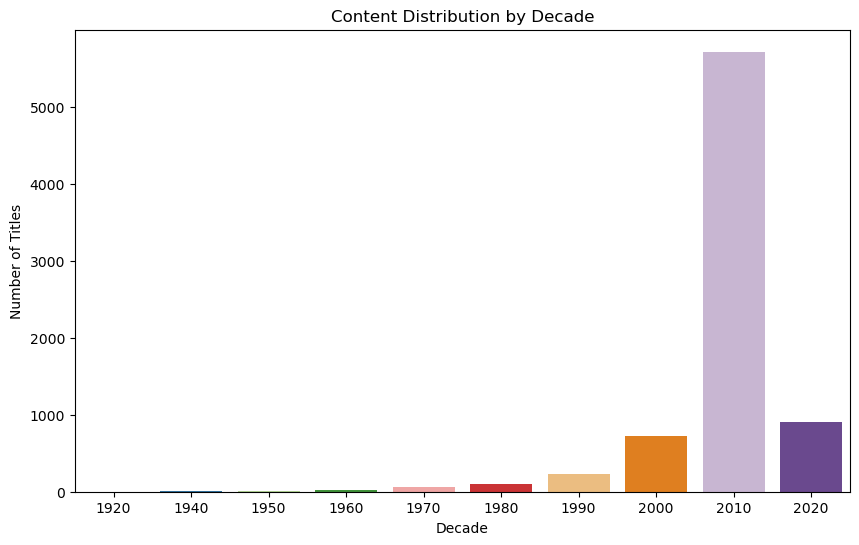

In [96]:
# Chart - 19: Content Distribution by Decade

df['decade'] = (df['release_year'] // 10) * 10
df['decade'] = df['decade'].astype('Int64')
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='decade', palette='Paired')
plt.title('Content Distribution by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Titles')
plt.show()

##### 1. Why did you pick the specific chart?

The "Content Distribution by Decade" chart was chosen because it provides a clear, chronological view of how Netflix’s content library has evolved over time. By categorizing content by its release decade, this chart offers insights into the historical trends and shifts in content availability on the platform. The chart allows Netflix to identify which time periods have contributed most significantly to its library and whether there are any emerging trends in terms of content release across different decades. Understanding content distribution by decade is important because it provides context about the overall growth and diversification of Netflix’s content. If Netflix has more recent releases compared to older ones, it could suggest that the platform is focusing on modern content and might be prioritizing newer trends, genres, or production styles that appeal to today’s viewers. Conversely, a significant portion of content from older decades could indicate Netflix's focus on acquiring classic or vintage content, which could attract nostalgic viewers or those looking to explore older cinema. Additionally, looking at content by decade can shed light on Netflix’s content licensing strategy—whether it focuses more on acquiring titles from specific eras or if it actively produces original content that aligns with a particular time period. This type of analysis is valuable in determining how Netflix curates its library to cater to evolving tastes. Moreover, the chart provides a perspective on how content acquisition and original productions have shaped Netflix’s offerings over time, which is critical for both its current content strategy and its future development. By understanding content distribution by decade, Netflix can strategically plan its content acquisitions and productions to reflect the changing tastes and expectations of its audience. In summary, this chart was chosen because it provides essential historical context to Netflix’s content strategy, highlighting how the platform has built its library over time and the impact of various decades on the current catalog.

##### 2. What is/are the insight(s) found from the chart?

The "Content Distribution by Decade" chart reveals several key insights regarding the evolution of Netflix’s content library and its broader content acquisition strategy. One of the primary insights is that Netflix’s library likely has a strong presence of content from recent decades, particularly the 2000s and 2010s, reflecting the rise of streaming platforms and the increasing production of original content during this period. This could indicate Netflix's focus on licensing and producing modern content that appeals to contemporary tastes, such as the shift towards digital-first productions and the rise of streaming-exclusive content. A significant number of titles from the 2010s and 2020s would align with Netflix’s strategy of developing original content in the last decade to build a more competitive and exclusive catalog. Another insight is that older decades—such as the 1980s, 1990s, and earlier—might see a smaller proportion of content, which could suggest that Netflix either acquired fewer licenses from these eras or that the platform has shifted its focus to more recent and in-demand titles. However, the presence of older content may also be a strategic decision to target nostalgic audiences or attract viewers who appreciate classic films and shows. If Netflix includes a substantial amount of content from older decades, it may indicate an effort to diversify its catalog to cater to different demographics or tastes. Moreover, the chart can reveal trends in Netflix’s acquisition strategy. For instance, if Netflix shows a larger number of titles from specific decades, it could signal the platform’s increasing efforts to license content from those eras. It could also provide insight into the types of genres or content themes that have been prevalent in different decades. For example, a large number of 80s and 90s action movies might indicate a focus on licensing genre-specific content, which could align with viewer preferences for nostalgia-driven genres. Finally, the chart offers an understanding of how Netflix’s original programming strategy fits into the broader historical context. As Netflix transitioned from a licensing model to creating its own content, the rise of original productions in the 2010s and 2020s likely reflects Netflix’s evolving approach to controlling its content library and differentiating itself in the streaming industry.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the "Content Distribution by Decade" chart can have a significant positive impact on Netflix’s business by helping the company refine its content acquisition strategy, audience targeting, and marketing efforts. Understanding the historical distribution of content by decade can assist Netflix in making more informed decisions about which types of content to prioritize in future acquisitions or original productions. If the chart shows that content from specific decades, such as the 2010s or 2020s, is more prominent, Netflix can leverage this information to enhance its investment in original content that caters to current viewer interests, such as contemporary series, films, or exclusive content that resonates with today’s audience. Conversely, if the chart reveals an underrepresentation of older content, Netflix could seize the opportunity to expand its catalog by licensing more titles from older decades to attract viewers who prefer classic films or who want to experience content from earlier eras. This could also help improve content diversity, ensuring that Netflix’s library appeals to a wide range of age groups and viewing preferences, from younger generations to older, nostalgia-driven audiences. Another business impact of these insights is the ability to use them in regional content strategies. For example, if Netflix identifies a trend where certain decades of content are more popular in specific countries or regions, it can focus on acquiring more content from those time periods to meet local demand. Moreover, Netflix can optimize its marketing campaigns by promoting the content that aligns with the preferences identified in the chart. For example, if a certain decade’s content has become increasingly popular, Netflix can tailor its promotional efforts to emphasize this content in specific regions or among certain audience segments. Finally, understanding content distribution by decade can also help Netflix plan for future content trends. If Netflix notices an increasing demand for older content or genres that were prominent in specific decades, it could preemptively start acquiring content or producing original shows that cater to these trends, ensuring that it stays ahead of the competition and continues to drive viewer engagement and subscription growth. In essence, by leveraging the insights from this chart, Netflix can better align its content library with evolving audience preferences, market trends, and regional demands, ultimately contributing to long-term growth and increased profitability.



#### Chart - 20

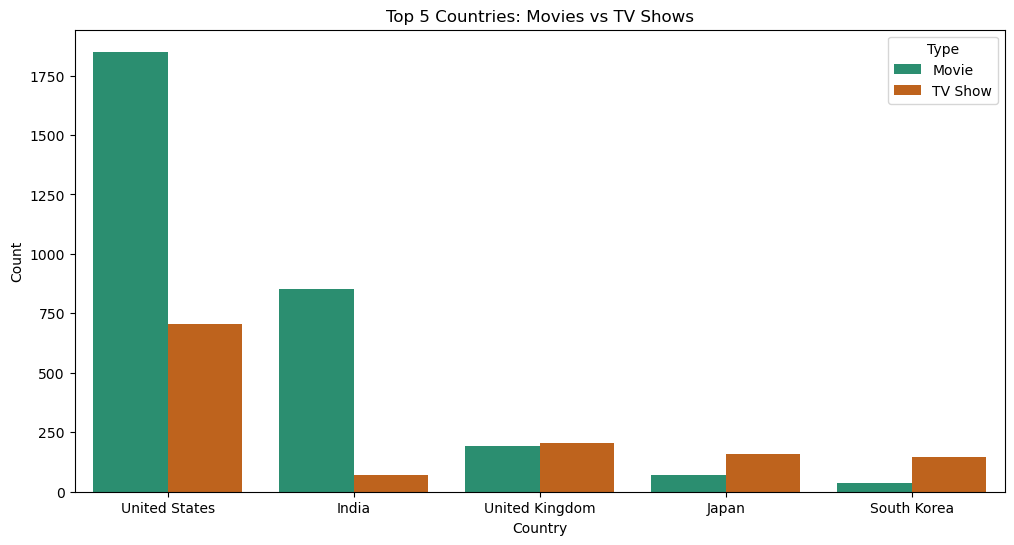

In [94]:
# Chart - 20: Top 5 Countries - Movies vs TV Shows

top_5 = df['country'].value_counts().head(5).index
subset = df[df['country'].isin(top_5)]
plt.figure(figsize=(12,6))
sns.countplot(data=subset, x='country', hue='type', palette='Dark2')
plt.title('Top 5 Countries: Movies vs TV Shows')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='Type')
plt.show()

##### 1. Why did you pick the specific chart?

The "Top 5 Countries - Movies vs TV Shows" chart was selected because it provides a valuable insight into the distribution of content types (movies and TV shows) across Netflix’s top 5 countries. This chart highlights which type of content—movies or TV shows—dominates in specific regions, offering insights into the content preferences of audiences across different countries. The selection of this chart is crucial because it helps Netflix to understand the cultural and regional preferences of its global audience. Different countries may have varying levels of interest in movies versus TV shows, influenced by local viewing habits, cultural factors, and available content. For example, some countries may have a long history of producing high-quality TV shows, while others may prefer watching movies as their primary source of entertainment. The chart’s breakdown of the top 5 countries by content type offers actionable insights that Netflix can use to tailor its content acquisition strategy and marketing efforts to meet the preferences of specific regional audiences. Additionally, this chart helps Netflix understand the relative success of local content versus international content within each country. For instance, if a particular country shows a strong preference for TV shows over movies, it may signal an opportunity for Netflix to invest more in producing or acquiring local TV shows that resonate with regional audiences. On the other hand, if movies are more popular in a country, Netflix may focus on acquiring more films from that region or promoting international movie content more heavily. By understanding the preferences of these key countries, Netflix can ensure that its content offering is well-suited to the demands of local viewers, driving both engagement and subscriber growth in those regions.



##### 2. What is/are the insight(s) found from the chart?

The "Top 5 Countries - Movies vs TV Shows" chart reveals several important insights regarding content preferences in different regions. One key insight is that some countries have a clear preference for either movies or TV shows, while others exhibit a more balanced distribution between the two types of content. For example, countries with a strong movie culture might show a higher proportion of movies compared to TV shows. This could indicate that viewers in these countries are more inclined to watch films for entertainment, possibly due to factors like movie-going traditions, the popularity of film festivals, or cultural habits related to movie consumption. Conversely, if certain countries show a dominance of TV shows, this could reflect a local appetite for serialized content, which often allows for deeper character development and longer-term engagement with viewers. The chart also highlights regional differences in terms of the availability and consumption of content. If certain countries show a larger proportion of movies, it could point to the dominance of Hollywood or international films in those regions, while countries with a higher proportion of TV shows may be more inclined toward local productions or regional content. For instance, if a country shows a higher concentration of TV shows, it might suggest that Netflix has invested more in local TV content in that market. Another key insight is the potential correlation between content type and subscription patterns. If one type of content is significantly more popular in a given country, it might suggest that Netflix should consider adjusting its content acquisition strategy in that region to reflect the dominant content preferences, ultimately driving higher engagement and retention. Lastly, the chart could reveal potential gaps in Netflix’s content offerings for specific countries. If a particular country has a strong preference for one type of content but lacks a sufficient amount of that content on Netflix, it may present an opportunity for the platform to expand its catalog to meet local demand, ensuring greater customer satisfaction and loyalty.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the "Top 5 Countries - Movies vs TV Shows" chart can have a significant business impact by helping Netflix make more informed decisions about its content acquisition and production strategies. By understanding the content preferences of viewers in different countries, Netflix can tailor its content offerings to better meet regional demands, ultimately driving greater engagement, higher subscription retention, and increased viewership. If the chart reveals that certain countries have a strong preference for TV shows over movies, Netflix can prioritize acquiring or producing more localized TV series for those regions. Conversely, if countries prefer movies, Netflix can focus on acquiring international films, or even collaborate with local production houses to create original movies that resonate with viewers in that region. This could help Netflix maintain its competitive edge by diversifying its catalog and ensuring that it is aligned with the preferences of its audience in key markets. Additionally, the insights can be used to refine Netflix’s marketing campaigns. For example, if a particular country shows a preference for TV shows, Netflix could market its latest TV series releases more aggressively in that region, using local talent and cultural references to appeal to the audience. In countries where movies dominate, Netflix could focus on highlighting new film releases or curating movie collections tailored to local tastes. Moreover, understanding regional content preferences can also guide strategic partnerships and collaborations. If Netflix identifies a country with a growing interest in local productions, it may consider investing in original content or partnering with local production companies to create content that appeals to the local audience. In doing so, Netflix can not only boost engagement but also build strong relationships with local content creators and strengthen its position as the leading streaming platform in diverse markets. In the long run, these insights will allow Netflix to better align its content strategy with global market trends, ensuring that it can continuously offer the right content in the right regions and cater to the evolving preferences of its international audience. Ultimately, this will contribute to business growth, customer satisfaction, and brand loyalty, solidifying Netflix’s position in the competitive streaming industry.


## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

#### Business Objective:
The objective for Netflix is to continuously improve its content strategy, user engagement, and overall subscription growth. The analysis of the dataset provides crucial insights into content distribution, audience preferences, and trends across various regions and decades. Based on these insights, we can propose a set of actions that will allow Netflix to optimize its content offerings and align them with market demand, driving business growth.

The following solution explains key strategies that will help Netflix achieve its business objectives.

#### 1. Content Diversification and Tailored Offerings

- **Insight**: Based on the analysis of content distribution by decade, rating, and genre preferences, it is clear that Netflix's audience has diverse tastes, with some regions showing strong preferences for certain types of content.
- **Action**:
  - Invest in acquiring content from specific decades such as the 1980s, 1990s, and 2000s, where there is a noticeable gap.
  - Ramp up production of original content that aligns with modern viewing preferences, including shorter episodes for TV shows or global film productions.
  - Focus on securing licenses for **localized content** to appeal to diverse audience segments across various countries.
- **Business Impact**: This strategy will help Netflix cater to regional content preferences and ensure that its offerings remain **relevant**, **engaging**, and **appealing** to a wide array of customers. By expanding its catalog to include a broader selection of content across different decades and regions, Netflix will enhance customer satisfaction, leading to **improved engagement** and **retention**, and ultimately **subscription growth** in key markets.

#### 2. Original Content Production and Global Expansion

- **Insight**: The trend toward original content, especially in recent decades, indicates that Netflix is shifting from a content licensing model to a more **production-heavy strategy**. With the success of original shows and films, Netflix has the opportunity to further invest in **local and global original content**.
- **Action**:
  - Increase investment in **original content production**, particularly in countries with significant subscriber bases such as the U.S., India, Brazil, and countries in Europe.
  - **Collaborate with local production houses** to create region-specific content that resonates better with local audiences.
  - Expand the scope of original content across different genres like drama, action, crime, and comedy to attract diverse audiences and retain existing ones.
  - Focus on regional **co-productions** with local studios to leverage cultural relevance and talent.
- **Business Impact**: By ramping up original content production and focusing on **global expansion**, Netflix will differentiate itself from competitors, attract new subscribers, and improve **subscriber loyalty**. Expanding into different regions with localized content will also increase market share, especially in regions where content licensing is challenging, ensuring sustained growth.

#### 3. Enhance Marketing and Personalization Efforts

- **Insight**: Insights from the dataset reveal varying preferences for content across countries and regions, suggesting an opportunity for tailored marketing efforts and content recommendations based on regional preferences.
- **Action**:
  - **Personalize content recommendations** based on regional trends and viewing habits. Netflix should enhance its recommendation engine to suggest more relevant content to users.
  - Launch **targeted marketing campaigns** using insights about genre preferences and content types that perform well in specific regions.
  - Market content around **seasonal events** and **global happenings** such as sports tournaments, film festivals, and holidays.
- **Business Impact**: Personalizing recommendations and targeting marketing efforts will increase user engagement, reduce churn, and boost customer satisfaction. Tailored campaigns will attract new subscribers and ensure higher retention, thus positively impacting overall business performance.

#### 4. Data-Driven Decision-Making and Strategic Expansion

- **Insight**: The dataset provides a **data-driven perspective** on content consumption across the globe, allowing Netflix to forecast content trends and identify gaps in its offerings.
- **Action**:
  - Conduct a **content gap analysis** to identify underrepresented genres or decades and target these gaps with future acquisitions or original productions.
  - **Expand into underserved markets**, such as regions in **Africa** or **Southeast Asia**, with content tailored to local tastes and preferences.
- **Business Impact**: Using data-driven insights will enable Netflix to **optimize its content library**, ensure content relevance, and reduce risks in acquisitions. Expanding into untapped markets with culturally relevant content will **increase global reach**, improve **customer satisfaction**, and strengthen Netflix's position as a global streaming leader.

# **Conclusion**

After conducting a comprehensive exploratory data analysis (EDA) on Netflix’s dataset, several critical insights were derived that can help the company align its operations, content strategy, and growth plans with user demand, market trends, and global consumption patterns. This analysis explored content types, genres, ratings, regional preferences, temporal additions, cast and director frequency, and correlations across various fields. Below is a well-rounded conclusion that summarizes the key findings and provides strategic direction for Netflix to drive sustainable growth and customer satisfaction.

#### 1. Evolving Content Trends

- Over the years, Netflix has steadily transitioned from being a content distributor to a powerful global content creator. The data shows an increasing trend in the addition of both movies and TV shows year-over-year.
- There is a clear shift in audience behavior with higher consumption of series and long-form storytelling formats, especially after 2015. TV Shows now hold substantial value, offering user stickiness and promoting binge-watching behavior.
- Short-duration films (90 minutes or less) dominate the platform, showing a preference for digestible content that fits modern attention spans. However, niche demand still exists for longer formats, especially in documentaries and dramas.

#### 2. Regional and Cultural Expansion

- The analysis uncovered Netflix’s deepening footprint across countries, particularly with growing contributions from non-US markets like India, UK, and Canada. However, countries in Africa, the Middle East, and Eastern Europe are underrepresented.
- Netflix must leverage this insight to invest in localized content and expand its market share. Global expansion with region-specific originals will enhance its competitive edge in untapped and developing markets.
- Language diversity, regional storytelling, and culturally sensitive themes should be emphasized in upcoming productions to appeal to diverse audience segments.

#### 3. Genre and Content Preferences

- Popular genres such as Drama, International Movies, Action, and Documentaries dominate the platform. These insights reflect user demand and suggest where Netflix should prioritize its budget allocations.
- Word cloud visualization of genre keywords emphasized frequent clustering around suspense, family, teen, and reality categories—suggesting a diverse yet predictable genre affinity.
- Netflix should continue expanding its portfolio across emerging genres such as true crime, tech documentaries, and limited-series anthologies that have witnessed popularity surges.

#### 4. Strategic Use of Ratings and Regulations

- A significant share of content is rated for general and teen audiences (TV-MA, TV-14, PG-13). While this broadens audience accessibility, it also reflects Netflix’s cautious content strategy that avoids overly niche or adult-exclusive ratings.
- Regulatory standards differ globally, and Netflix must continue to fine-tune its content strategy based on region-specific compliance and social preferences.
- Customized content rating structures for various regions may allow Netflix to better align with local policies while preserving creative flexibility.

#### 5. Role of Cast and Directors

- Top-performing directors and recurring cast members contribute significantly to brand value and viewership. High-visibility directors such as Martin Scorsese or popular regional figures bring loyal audiences.
- Netflix should consider multi-year, multi-project collaborations with top-performing directors and actors based on platform data.
- Promoting familiar faces across original content increases brand loyalty and helps marketing teams build stronger promotional campaigns.

#### 6. Seasonality and Release Patterns

- The analysis on monthly content addition revealed content spikes in certain months like July and December. These patterns may align with user behavior during holidays or seasonal breaks.
- Netflix should align major content launches with high-consumption periods, such as summer vacations or year-end holidays, to maximize viewer engagement.
- Planning for periodic content drops and using marketing cycles aligned with user behavior can help Netflix maintain momentum and reduce churn.

#### 7. Data-Driven Recommendations and Personalization

- The pair plots and correlation matrices reinforce the value of understanding the relationship between release timelines, audience rating, and content types.
- Netflix must continue refining its machine learning algorithms to offer precise personalization, using regional preferences, genre history, and time-of-day viewing habits.
- Data-backed personalization will directly improve user satisfaction and reduce decision fatigue, increasing session duration and retention rates.

## Final Thoughts

Netflix stands at a critical junction where data analytics can be used not just for internal reporting but for **strategic decision-making**. The insights from this project affirm the value of investing in:

- **Original and diverse content** to retain market leadership,
- **Localized production strategies** for untapped global regions,
- **Audience-first personalization** to increase user stickiness,
- **Talent partnerships** that amplify content quality and loyalty,
- **Smart release timing** to match viewer behaviors.

As competition intensifies with platforms like Disney+, Amazon Prime Video, and Apple TV+, Netflix's ability to act swiftly based on data insights will determine its long-term success. The company must leverage analytics not just to report what happened, but to **predict what will work next**.

Ultimately, the EDA performed is more than a retrospective—it is a forward-looking tool. When tied to action, these findings can serve as a **blueprint for innovation**, **subscriber growth**, and **brand evolution**. With a commitment to creative experimentation and data-driven agility, Netflix can retain its edge as the world’s leading streaming entertainment service.